# Market Research on Restaurants in Los Angeles

A robot-run establishment in Los Angeles is going to be opened.

Establishment names and types, chain or non-chain, addresses, and a number of seats on restaurants in Los Angeles are availible. 

The purpose of the study: prepare market research in order to provide recommendations on restaurant type and number of seats as well as to assess the possibility of developing a chain.

Table of contents:

<a href='#section1'>1. Getting the data and preparing it for the analysis</a>

* <a href='#section1.1'>1.1. Getting the data and study the general information</a>

* <a href='#section1.2'>1.2. Data Preprocessing</a>

* <a href='#section1.3'>1.3. Main Conclusions</a>

<a href='#section2'>2. Analyzing the data and plotting the graphs</a>

* <a href='#section2.1'>2.1. The proportions of the various types of establishments</a>

* <a href='#section2.2'>2.2. The typical type of chain and non-chain establishments</a>

* <a href='#section2.3'>2.3. The proportions of chain and nonchain establishments</a>

* <a href='#section2.4'>2.4. Chain: the number of chain branches and the number of seats they have</a>

* <a href='#section2.5'>2.5. The average number of seats for each type of establishment</a>

* <a href='#section2.6'>2.6. The top ten streets by number of establishments</a>

* <a href='#section2.7'>2.7. The number establishments on the street</a>

* <a href='#section2.8'>2.8. The distribution of seats number for establishments on top 10 popular streets</a>

* <a href='#section2.9'>2.9. Main Conclusions</a>

<a href='#section3'>3. Recomendations</a>

Please download the presentation for investors at the link below.

Presentation: https://keybase.pub/nastysunchen/Roboter-run_cafe_20210501-better.pdf

In [1]:
# installation of the library that will help us to exctract street names from a address string:

In [2]:
pip install usaddress

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 63 kB 831 kB/s eta 0:00:011
     |████████████████████████████████| 743 kB 1.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns 
import usaddress
import re

# some global constats for formatting the output string
BOLD = '\033[1m'
END = '\033[0m'

## 1. Getting the data and preparing it for the analysis
<a id='section1'></a>

### 1.1 Getting the data and study the general information
<a id='section1.1'></a>

In [4]:
# reading file that contains the data on restaurants in LA  
data = pd.read_csv('/datasets/rest_data_us.csv')

# Let's look at the data's general information 
print(BOLD + 'General information:' + END)
print(data.info())
print()

# Let's look at the first few rows in tables
print(BOLD + 'The first few rows in the table containing the data on restaurants in LA :' + END)
display(data.head(10))

General information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None

The first few rows in the table containing the data on restaurants in LA :


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


*The dataset contains __9651 records about restaurans__ of different types in Los Angeles.*

*There are __2 missing values in the `'chain'` column__. It worth looking at the names of the establishments with these missing values. If we have the same names in the dataset we could restore the `'chain'` value to True.*

*For the colimn `'chain'` object type is used, it would be enough just Boolean or use the category type.*

*In the first ten raws, we have establishments with very few seats such as 7 or 9, one seat looks like a missing value, or establishments that only have a shop (like a bakery) or it's just a delivary.*

The values that take features:
Number of unique values for the corresponding feature:


,nunique
id,9651
object_name,8672
address,8517
chain,2
object_type,6



Options for the types of establishments:


,unique
object_type,"[Cafe, Restaurant, Fast Food, Bakery, Bar, Pizza]"



Number of establishments in non-chain and chain restaurants


chain,False,True
object_name,5972,3676



The descriptive statistics for the number of seats feature:


,count,mean,std,min,25%,50%,75%,max
number,9651.0,43.695161,47.622874,1.0,14.0,27.0,46.0,229.0



Number of establishments with 1 seat: 187

Number of establishments with 1 seat by type:


,count
object_type,
Bakery,10
Bar,11
Cafe,5
Fast Food,27
Pizza,4
Restaurant,130


Histogram for the number of seat:


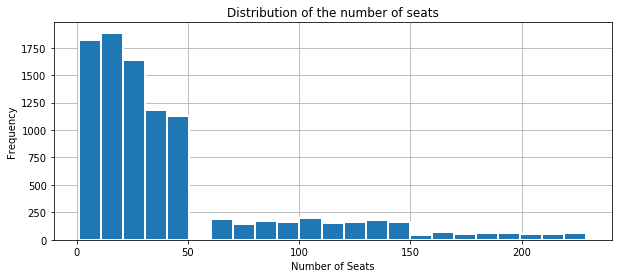

In [5]:
#Let's look at the values that take features
print(BOLD + 'The values that take features:' + END)

print('Number of unique values for the corresponding feature:')
display(data[['id', 'object_name', 'address', 'chain', 'object_type']].agg(['nunique']).T)
print()

print('Options for the types of establishments:')
display(data[['object_type']].agg(['unique']).T)
print()

print('Number of establishments in non-chain and chain restaurants')
display(data.pivot_table(columns='chain', values='object_name', aggfunc='count'))
print()

print('The descriptive statistics for the number of seats feature:')
display(pd.DataFrame(data.number.describe()).T)
print()

print('Number of establishments with 1 seat:', len(data[data.number==1]))
print()
print('Number of establishments with 1 seat by type:')
display(data[data.number==1].groupby('object_type').object_name.agg(['count']))

print('Histogram for the number of seat:')
plt.rc('axes', grid=True, axisbelow=True) 
plt.rc('patch', edgecolor='w', linewidth=2, force_edgecolor=True) 
fig, ax = plt.subplots(figsize=(10, 4))
data.number.hist(bins=23, ax=ax);
ax.set_title('Distribution of the number of seats')
ax.set_xlabel('Number of Seats');
ax.set_ylabel('Frequency');
plt.show()

*Slightly more than 8.6 from about 9.6 names of establishments are unique. Thus, about 1000 establishments have more than 1 branch.*

*More than 1000 addresses have more than 1 establishment.*

*In the dataset, there are 6 types of establishments: Cafe, Restaurant, Fast Food, Bakery, Bar, and Pizza.*

*Almost 3700 establishments are chain, it's about 40%.*

*On average, the establishment has about 30 seats. Most of the values are almost evenly distributed from 1 to 30. The mean is biased towards higher values compared to the median due to large numbers of seats for some establishments (see havy tail in the histogram). Thus, the maximum number of seats is 229. There are not many 1-seat establishments in the dataset, but it's difficalt to manualy check them. Moreover, there are such establishments for all types.*

### 1.2 Data Preprocessing
<a id='section1.2'></a>

#### Examing and Processing Missing Values

In [6]:
# Let's investigete missing values
print(BOLD + "Data on establishments with missing values for the feature 'chain':" + END)
display(data[data.chain.isnull()])

print(BOLD 
      + "Number of establishments with the same names as restaurants with missing values for the feature 'chain':" 
      + END)
display(data[data.object_name.isin(data[data.chain.isnull()].object_name)].object_name.value_counts())

Data on establishments with missing values for the feature 'chain':


,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


Number of establishments with the same names as restaurants with missing values for the feature 'chain':


JAMMIN JIMMY'S PIZZA       1
THE LEXINGTON THEATER      1
TAQUERIA LOS 3 CARNALES    1
Name: object_name, dtype: int64

*There are no establishments with the same names as restaurants with missing `'chain'` values. There is nothing unusual in the data for these establishments, except one seat for the pizzeria. We can fill in the `'chain'` values with False.*

*Note the name of JAMMIN JIMMY'S PIZZA contains the type of establishment. It is useful to check the correspondence for other establishments.*

In [7]:
# filling in the missing values
data.chain.fillna(False, inplace=True)

#converting excess type with help of astype() method:
data['chain'] = data.chain.astype('bool')

*We replaced the missing values of the `'chain'` feature with False, and then we converted the exces type for this column.*

#### Data consistency checking

In [8]:
# Let's check if the type in the name of the establishment matches with the type of the establishment

# getting all types of establishments
establishment_types = data.object_type.unique()

# function to get all inconsistencies for the specified type of establishment in the name
# cases of several types in the name are not considered
def get_inconsistent_count(type_to_check):
    rest = set(establishment_types) - set([type_to_check])
    return data[(data.object_type!=type_to_check)\
                &data.object_name.str.contains(type_to_check.upper())\
                &~data.object_name.str.contains('|'.join([x.upper() for x in rest]))]

for t in establishment_types:
    print(BOLD + 'The first few rows with inconsistent type with ' + t.upper() + ' in the name:' + END)
    display(get_inconsistent_count(t).head(5))
    print('Options for object_type: ', ', '.join(get_inconsistent_count(t).object_type.unique()))
    print()

print(BOLD + 'Number of cases of name and type mismatch:' + END)
pd.DataFrame({t: len(get_inconsistent_count(t)) for t in establishment_types}, index=['inconsistent name and type'])

The first few rows with inconsistent type with CAFE in the name:


,id,object_name,address,chain,object_type,number
20,11806,CRYSTAL CAFE,3500 W 6TH ST STE #321,False,Restaurant,16
21,11807,ORANGE TREE CAFE,3500 W 6TH ST STE #220,False,Restaurant,14
24,11810,M CAFE DE CHAYA,7119 MELROSE AVE,True,Restaurant,43
26,11812,LA INDIA BONITA CAFE,1277 S INDIANA ST,False,Restaurant,19
30,11816,CAFE 153,1125 3/4 WALL ST,False,Restaurant,5


Options for object_type:  Restaurant, Fast Food

The first few rows with inconsistent type with RESTAURANT in the name:


,id,object_name,address,chain,object_type,number
482,12268,MCDONALD'S RESTAURANT,988 W SLAUSON AVE,True,Fast Food,43
2684,14470,TACO TU MADRE RESTAURANT,724 S SPRING ST STE 110,True,Fast Food,18
2837,14623,EL ATACOR RESTAURANT #8,6506 WHITTIER BLVD,True,Fast Food,2
3586,15372,MAYAS TACOS RESTAURANT,1600 N ALVARADO ST,True,Fast Food,22
4258,16044,EL ATACOR RESTAURANT,3520 N FIGUEROA ST,True,Fast Food,41


Options for object_type:  Fast Food, Cafe

The first few rows with inconsistent type with FAST FOOD in the name:


,id,object_name,address,chain,object_type,number
449,12235,FIESTA FAST FOOD,5532 YORK BLVD,True,Restaurant,29
999,12785,LUCKYS CHINESE FAST FOOD,5333 S MAIN ST,True,Restaurant,4
1126,12912,NANAY GLORIAS FAST FOOD&RSTR,"3756 W AVENUE 40 # ""L""",True,Restaurant,110
1367,13153,LITTLE ONGPIN FAST FOOD,1700 W BEVERLY BLVD,True,Restaurant,28
1710,13496,#1 CHINESE FAST FOOD,8606 S VERMONT AVE,True,Restaurant,6


Options for object_type:  Restaurant

The first few rows with inconsistent type with BAKERY in the name:


,id,object_name,address,chain,object_type,number
2586,14372,MON DELIZ COFFEE & BAKERY,5357 SANTA MONICA BLVD,True,Cafe,42
5276,17062,NAZOHS BAKERY & COFFEE SHOP,810 W 8TH ST,True,Cafe,16
5414,17200,JINGS DONUT & BAKERY,5150 S HUNTINGTON DR S STE #101,True,Fast Food,23
7991,19777,FRANCES BAKERY AND COFFEE,404 E 2ND ST,True,Cafe,18


Options for object_type:  Cafe, Fast Food

The first few rows with inconsistent type with BAR in the name:


,id,object_name,address,chain,object_type,number
137,11923,ASHLAND BAR EARTH BAR / PANDA EXPRESS ASHLAND ...,300 WORLD WAY # 329,True,Fast Food,25
348,12134,CATALINA'S BAR & GRILL,6725 W SUNSET BLVD,False,Restaurant,185
574,12360,D-TOWN BURGER BAR,216 W 6TH ST,False,Fast Food,2
586,12372,KANPAI JAPANESE SUSHI BAR & GRILL,8736 S SEPULVEDA BLVD UNIT C,False,Restaurant,32
618,12404,GAME SPORTS BAR AND GRILL,5630 W MANCHESTER AVE,False,Restaurant,166


Options for object_type:  Fast Food, Restaurant, Cafe

The first few rows with inconsistent type with PIZZA in the name:


,id,object_name,address,chain,object_type,number
394,12180,LIVE BASIL PIZZA-SMASH BURGER-TOM'S URBAN,1011 S FIGUEROA ST B101 -B201,False,Fast Food,127
7067,18853,TACO BELL/PIZZA HUT,2800 S CRENSHAW BLVD,True,Fast Food,44


Options for object_type:  Fast Food

Number of cases of name and type mismatch:


,Cafe,Restaurant,Fast Food,Bakery,Bar,Pizza
inconsistent name and type,541,11,22,4,50,2


*We have over 500 inconsistencies in the establishments' names containing the word "Cafe" with their types, and few ones for other types.*

*When the name of the establishment contains word "Cafe" it makes sense to change the type from 'Restaurant' to 'Cafe' sinse it appears in the name and we are interested in exactly cafes, and not change the type from 'Fast Food' to 'Cafe' since it's a completely separate type of establishments that may have different names, including the words "Cafe", "Restaurant", "Bar" or even "Bakery" in name.*

*It also makes sense to change the type to 'Fast Food' if it appears in the name.*

*If we have words "Bakery", it is not worth changing the type to 'Bakery' since a bakery might be indeed a small cafe or a fast food chain branch.*

*In the case of the "Bar", it is not worth changing the type either since it might be a restaurant which has "Suchi-bar" in name or other type of establishment.*

*Note the fast food chain restaurant "EL ATACOR RESTAURANT #8" has a hash mark and a digit in its name. It makes sense to remove such symbols from the name of chain establishments in order to correct calculating the number of establishments in the chain.*

In [9]:
# Let's save the appropriate types of establishments in a separate column.
# copying values to a separate column
data['type'] = data.object_type

# changing the type of establishment to 'Cafe' for some establishments
data.loc[(data.object_type=='Restaurant')&data.object_name.str.contains('CAFE')\
         &~data.object_name.str.contains('BAR|RESTAURANT|FAST FOOD|BAKERY|PIZZA'),
     'type']='Cafe'

# changing the type of establishment to 'Fast Food' for some establishments
data.loc[data.object_name.str.contains('FAST FOOD')\
         &~data.object_name.str.contains('BAR|RESTAURANT|CAFE|BAKERY|PIZZA'),
     'type']='Fast Food'

*We have changed the type of establishment from 'Restaurant' to 'Cafe' for establishments whose name contains the word "Cafe". The type of establishments has been changed to 'Fast Food' if this word appears in the name of the establishment. The appropriate types have been stored in a separate column.*

#### Examing and Processing Duplicates

In [10]:
# Let's find out the duplicates
print("Number of rows that have dublicate 'object_name', 'address', 'chain', 'object_type', 'number':",
      sum(data[['object_name', 'address', 'chain', 'object_type', 'number']].duplicated()))
print()

print("Number of rows that have dublicate 'object_name' and 'address':",
      sum(data[['object_name', 'address']].duplicated()))

Number of rows that have dublicate 'object_name', 'address', 'chain', 'object_type', 'number': 0

Number of rows that have dublicate 'object_name' and 'address': 0


*The dataset does not contain full duplicate records, as well as a duplicate pair consisting of the name of the establishment and its address.*

In [11]:
# Let's see if there are partially duplicated names of establishments

# function for getting the name of the establishments without additional symbols and digits in it
def get_pure_name(name):
    return re.sub("[^a-zA-Z' ]+", '', name).strip()

# getting all names of chain establishments containing names cleaned
for pure_name in data.query('chain==True').object_name.apply(get_pure_name).drop_duplicates():
    # except for too short names
    if len(pure_name)>2:
        similar_names = data[data.object_name.str.contains(pure_name)]\
                            .groupby(['object_name', 'chain']).address.count().reset_index()
        if len(similar_names) > 1:
            print('Pure name:', pure_name)
            display(similar_names)
            print()

Pure name: EL POLLO LOCO


,object_name,chain,address
0,EL POLLO LOCO,True,10
1,EL POLLO LOCO # 3540,True,1
2,EL POLLO LOCO # 5386,True,1
3,EL POLLO LOCO # 5502,True,1
4,EL POLLO LOCO #3280,True,1
5,EL POLLO LOCO #3301,True,1
6,EL POLLO LOCO #3364,True,1
7,EL POLLO LOCO #3369,True,1
8,EL POLLO LOCO #3531,True,1
9,EL POLLO LOCO #3730,True,1



Pure name: WABA GRILL


,object_name,chain,address
0,WABA GRILL,True,14
1,WABA GRILL FIGUEROA,True,1
2,"WABA GRILL, LLC",True,1



Pure name: SUBWAY


,object_name,chain,address
0,SUBWAY,True,31
1,SUBWAY 60937,True,1
2,SUBWAY # 16781,True,1
3,SUBWAY # 20906,True,1
4,SUBWAY # 29139,True,1
...,...,...,...
100,SUBWAY SANDWICHES AND SALADS,True,1
101,SUBWAY SANDWICHES SALADS,True,2
102,SUBWAY SANWICHES #38971,True,1
103,SUBWAY STORE #57912,True,1



Pure name: IHOP


,object_name,chain,address
0,IHOP,True,3
1,IHOP #782,True,1
2,IHOP #796,True,1
3,IHOP RESTAURANT,True,2



Pure name: PANDA EXPRESS


,object_name,chain,address
0,ASHLAND BAR EARTH BAR / PANDA EXPRESS ASHLAND ...,True,1
1,PANDA EXPRESS,True,6
2,PANDA EXPRESS # 2466,True,1
3,PANDA EXPRESS # 248,True,1
4,PANDA EXPRESS #1064,True,1
5,PANDA EXPRESS #119,True,1
6,PANDA EXPRESS #1212,True,1
7,PANDA EXPRESS #1271,True,1
8,PANDA EXPRESS #175,True,1
9,PANDA EXPRESS #2172,True,1



Pure name: TOGO'S


,object_name,chain,address
0,TOGO'S,True,3
1,TOGO'S #302593,True,1
2,TOGO'S / 31 BASKIN ROBBINS,True,1
3,TOGO'S/BASKIN ROBBINS,True,1



Pure name: JOHNNIE'S NEW YORK PIZZA


,object_name,chain,address
0,JOHNNIE'S NEW YORK PIZZA,True,2
1,JOHNNIE'S NEW YORK PIZZARIA /SERALIGHT,True,1



Pure name: MCDONALD'S


,object_name,chain,address
0,MCDONALD'S,True,13
1,MCDONALD'S #1126,True,1
2,MCDONALD'S # 10129,True,1
3,MCDONALD'S # 11118,True,1
4,MCDONALD'S # 11157,True,1
...,...,...,...
64,MCDONALD'S #7037,True,1
65,MCDONALD'S #7072,True,1
66,MCDONALD'S #7424,True,1
67,MCDONALD'S #8014,True,1



Pure name: BLD


,object_name,chain,address
0,BLD,True,3
1,CAFE DELI E PARK CENTRAL BLD,True,1
2,CRIMINAL COURT BLDG- KITCHEN,True,1



Pure name: LOCALI


,object_name,chain,address
0,LOCALI,True,2
1,LOCALITA & THE BADASSERIE,True,1



Pure name: JACK IN THE BOX


,object_name,chain,address
0,JACK IN THE BOX # 228,True,1
1,JACK IN THE BOX # 270,True,1
2,JACK IN THE BOX # 279,True,1
3,JACK IN THE BOX # 286,True,1
4,JACK IN THE BOX # 290,True,1
5,JACK IN THE BOX # 292,True,1
6,JACK IN THE BOX # 293,True,1
7,JACK IN THE BOX # 3215,True,1
8,JACK IN THE BOX # 326,True,1
9,JACK IN THE BOX # 3339,True,1



Pure name: JOHNNY ROCKETS


,object_name,chain,address
0,JOHNNY ROCKETS,True,2
1,JOHNNY ROCKETS #1,True,1
2,JOHNNY ROCKETS #406,True,1



Pure name: JIM'S BURGERS


,object_name,chain,address
0,JIM'S BURGERS,True,4
1,JIM'S BURGERS #10,True,1



Pure name: DER WIENERSCHNITZEL


,object_name,chain,address
0,DER WIENERSCHNITZEL,True,2
1,DER WIENERSCHNITZEL #20,True,1



Pure name: TUTTI FRUTTI


,object_name,chain,address
0,TUTTI FRUTTI,True,3
1,TUTTI FRUTTI FROZEN YOGURT,True,1
2,YOGURT TUTTI FRUTTI,True,1



Pure name: THE VEGGIE GRILL


,object_name,chain,address
0,THE VEGGIE GRILL,True,2
1,THE VEGGIE GRILL INC.,True,1



Pure name: CARL'S JR


,object_name,chain,address
0,CARL'S JR,True,8
1,CARL'S JR #102,True,1
2,CARL'S JR #12,True,1
3,CARL'S JR #212,True,1
4,CARL'S JR #273,True,1
5,CARL'S JR #299,True,1
6,CARL'S JR #321,True,1
7,CARL'S JR #337,True,1
8,CARL'S JR #408,True,1
9,CARL'S JR #422,True,1



Pure name: KIKKA SUSHI


,object_name,chain,address
0,KIKKA SUSHI,True,1
1,KIKKA SUSHI - WHOLE FOODS,True,1
2,KIKKA SUSHI @ SMART& FINAL #484,True,1



Pure name: PIZZA HUT


,object_name,chain,address
0,PIZZA HUT,True,1
1,PIZZA HUT #026176,True,1
2,PIZZA HUT #24951,True,1
3,PIZZA HUT #25408,True,1
4,PIZZA HUT #26143,True,1
5,PIZZA HUT #26149,True,1
6,PIZZA HUT #26152,True,1
7,PIZZA HUT #26154,True,1
8,PIZZA HUT #26158,True,1
9,PIZZA HUT #26159,True,1



Pure name: JAMBA JUICE


,object_name,chain,address
0,JAMBA JUICE,True,2
1,JAMBA JUICE #1278,True,1
2,JAMBA JUICE #1279,True,1
3,JAMBA JUICE #14,True,2
4,JAMBA JUICE #1514,True,1
5,JAMBA JUICE #1546,True,1
6,JAMBA JUICE #36,True,1
7,JAMBA JUICE #38,True,1
8,JAMBA JUICE #399,True,1
9,JAMBA JUICE #425,True,1



Pure name: ANDANTE COFFEE ROASTERS


,object_name,chain,address
0,ANDANTE COFFEE ROASTERS,True,1
1,"ANDANTE COFFEE ROASTERS, INC",True,1



Pure name: YOSHINOYA


,object_name,chain,address
0,YOSHINOYA,True,4
1,YOSHINOYA # 4124,True,2
2,YOSHINOYA #1126,True,1
3,YOSHINOYA #1129,True,1
4,YOSHINOYA #1135,True,1
5,YOSHINOYA #1136,True,1
6,YOSHINOYA #1137,True,1
7,YOSHINOYA #1143,True,1
8,YOSHINOYA #1147,True,1
9,YOSHINOYA #1207,True,1



Pure name: TACO BELL


,object_name,chain,address
0,KFC TACO BELL E791001,True,1
1,KFC TACO BELL E791008,True,1
2,KFC/TACO BELL # H730-124,True,1
3,TACO BELL,True,6
4,TACO BELL # 28707,True,1
5,TACO BELL #004554,True,1
6,TACO BELL #1178,True,1
7,TACO BELL #15349,True,1
8,TACO BELL #17194,True,1
9,TACO BELL #17931,True,1



Pure name: POLLO CAMPERO


,object_name,chain,address
0,POLLO CAMPERO,True,6
1,POLLO CAMPERO #24,True,1



Pure name: VAN BAKERY


,object_name,chain,address
0,TBILISI & YEREVAN BAKERY,True,1
1,VAN BAKERY,True,1



Pure name: LOUISIANA FRIED CHICKEN


,object_name,chain,address
0,CHINA BOWL AND LOUISIANA FRIED CHICKEN,True,1
1,LOUISIANA FRIED CHICKEN,True,10
2,LOUISIANA FRIED CHICKEN #4050,True,1
3,LOUISIANA FRIED CHICKEN & CHINA BOWL,True,1
4,LOUISIANA FRIED CHICKEN & CHINESE FOOD,True,3
5,LOUISIANA FRIED CHICKEN & FI,True,1
6,LOUISIANA FRIED CHICKEN & HONG 2,True,1
7,LOUISIANA FRIED CHICKEN TACO,True,1
8,PERFECT DONUT LOUISIANA FRIED CHICKEN,True,1



Pure name: KENTUCKY FRIED CHICKEN


,object_name,chain,address
0,KENTUCKY FRIED CHICKEN,True,14
1,KENTUCKY FRIED CHICKEN #111,True,1
2,KENTUCKY FRIED CHICKEN #119,True,1
3,KENTUCKY FRIED CHICKEN T32,True,1



Pure name: BURGER KING


,object_name,chain,address
0,BURGER KING,True,1
1,BURGER KING # 10724,True,1
2,BURGER KING # 10734,True,1
3,BURGER KING # 11053,True,1
4,BURGER KING # 11490,True,1
5,BURGER KING # 11658,True,1
6,BURGER KING # 13331,True,1
7,BURGER KING # 1417,True,1
8,BURGER KING # 1630,True,1
9,BURGER KING # 4946,True,1



Pure name: SAFFRON


,object_name,chain,address
0,INDUS BY SAFFRON,True,1
1,SAFFRON,True,2



Pure name: SUBWAY SANDWICHES


,object_name,chain,address
0,SUBWAY SANDWICHES,True,11
1,SUBWAY SANDWICHES #24202,True,1
2,SUBWAY SANDWICHES #28617,True,1
3,SUBWAY SANDWICHES #5449,True,1
4,SUBWAY SANDWICHES & SALADS,True,3
5,SUBWAY SANDWICHES 13941,True,1
6,SUBWAY SANDWICHES AND SALADS,True,1
7,SUBWAY SANDWICHES SALADS,True,2



Pure name: WHICH WICH


,object_name,chain,address
0,WHICH WICH,True,2
1,WHICH WICH #403,True,1



Pure name: TRIMANA


,object_name,chain,address
0,GOODIES TRIMANA,True,1
1,TRIMANA,True,13
2,TRIMANA 515 FIGUEROA,True,1
3,TRIMANA AT WATERIDGE,True,1
4,TRIMANA CITY HALL EAST,True,1
5,TRIMANA COMMONWEALTH,True,1
6,TRIMANA EXPRESS,True,2
7,TRIMANA GRILL,True,2
8,TRIMANA OF 11755 WILSHIRE,True,1
9,TRIMANA OF CALIFORNIAMART,True,1



Pure name: BAJA FRESH


,object_name,chain,address
0,BAJA FRESH,True,5
1,BAJA FRESH MEXICAN GRILL#049,True,1



Pure name: POKE BAR


,object_name,chain,address
0,POKE BAR,True,4
1,WH POKE BAR INC.,True,1



Pure name: CLEO


,object_name,chain,address
0,CLEO,True,4
1,CLEO BAR ON 2ND FLOOR,True,1



Pure name: DOMINO'S PIZZA


,object_name,chain,address
0,DOMINO'S PIZZA,True,15
1,DOMINO'S PIZZA # 8173,True,1
2,DOMINO'S PIZZA #7743,True,1
3,DOMINO'S PIZZA #7795,True,1
4,DOMINO'S PIZZA #7802,True,1
5,DOMINO'S PIZZA #7804,True,1
6,DOMINO'S PIZZA #7806,True,1
7,DOMINO'S PIZZA #8113,True,1
8,DOMINO'S PIZZA #8131,True,1
9,DOMINO'S PIZZA #8157,True,1



Pure name: EDIBLE ARRANGEMENTS


,object_name,chain,address
0,EDIBLE ARRANGEMENTS,True,5
1,EDIBLE ARRANGEMENTS-1003,True,1



Pure name: CHIPOTLE MEXICAN GRILL


,object_name,chain,address
0,CHIPOTLE MEXICAN GRILL,True,10
1,CHIPOTLE MEXICAN GRILL #04-1500,True,1
2,CHIPOTLE MEXICAN GRILL #1084,True,1
3,CHIPOTLE MEXICAN GRILL #1310,True,1
4,CHIPOTLE MEXICAN GRILL #1913,True,1
5,CHIPOTLE MEXICAN GRILL #1996,True,1
6,CHIPOTLE MEXICAN GRILL #2988,True,1
7,CHIPOTLE MEXICAN GRILL #3062,True,1
8,CHIPOTLE MEXICAN GRILL #3119,True,1
9,CHIPOTLE MEXICAN GRILL #758,True,1



Pure name: ONE CAFE


,object_name,chain,address
0,CAPITAL ONE CAFE,True,1
1,ONE CAFE,True,2



Pure name: STARBUCKS COFFEE


,object_name,chain,address
0,STARBUCKS COFFEE,True,2
1,STARBUCKS COFFEE # 5775,True,1
2,STARBUCKS COFFEE #10586,True,1
3,STARBUCKS COFFEE #10939,True,1
4,STARBUCKS COFFEE #10940,True,1
...,...,...,...
81,STARBUCKS COFFEE #9505,True,1
82,STARBUCKS COFFEE #9506,True,1
83,STARBUCKS COFFEE #9973,True,1
84,STARBUCKS COFFEE #9998,True,1



Pure name: LEMONADE


,object_name,chain,address
0,LEMONADE,True,4
1,LEMONADE ON SAWTELLE,True,1
2,LEMONADE RESTAURANT,True,2
3,LEMONADES,True,1



Pure name: GOLDEN BIRD


,object_name,chain,address
0,GOLDEN BIRD,True,2
1,GOLDEN BIRD INC.,True,1



Pure name: POPEYES


,object_name,chain,address
0,POPEYES,True,2
1,POPEYES CHICKEN,True,5
2,POPEYES CHICKEN #3375,True,1
3,POPEYES CHICKEN & BISCUITS,True,1



Pure name: DEL TACO


,object_name,chain,address
0,DEL TACO,True,1
1,DEL TACO # 1115,True,1
2,DEL TACO # 1193,True,1
3,DEL TACO #1105,True,1
4,DEL TACO #162,True,1
5,DEL TACO #862,True,1
6,DEL TACO #976,True,1
7,DEL TACO #988,True,1



Pure name: CHINA EXPRESS


,object_name,chain,address
0,CHINA EXPRESS,True,7
1,DAILY CHINA EXPRESS,True,1
2,K.H. CHINA EXPRESS,True,1
3,LITTLE CHINA EXPRESS,True,2



Pure name: EMPLOYEE CAFETERIA


,object_name,chain,address
0,EMPLOYEE CAFETERIA,True,1
1,EMPLOYEE CAFETERIA-MARRIOTT,True,1
2,LAACO EMPLOYEE CAFETERIA,True,1



Pure name: MIKE'S DELI


,object_name,chain,address
0,MIKE'S DELI,True,1
1,MIKE'S DELI #2,True,1



Pure name: WINCHELL'S DONUT HOUSE


,object_name,chain,address
0,WINCHELL'S DONUT HOUSE #9086,True,1
1,WINCHELL'S DONUT HOUSE #9445,True,1
2,WINCHELL'S DONUT HOUSE #9887,True,1



Pure name: BURGERIM


,object_name,chain,address
0,BURGERIM,True,2
1,SEEMA'S BURGERIM,True,1



Pure name: WINGSTOP


,object_name,chain,address
0,WINGSTOP,True,10
1,WINGSTOP #267,True,1
2,WINGSTOP #443,True,1
3,WINGSTOP #494,True,1
4,WINGSTOP #672,True,1
5,WINGSTOP REST #3,True,1



Pure name: CLASSIC THAI RESTAURANT


,object_name,chain,address
0,CLASSIC THAI RESTAURANT,True,1
1,OCHA CLASSIC THAI RESTAURANT,True,1



Pure name: YOGURTLAND


,object_name,chain,address
0,YOGURTLAND,True,12
1,YOGURTLAND BALDWIN HILLS,True,1
2,YOGURTLAND BOYLE HEIGHTS,True,1
3,YOGURTLAND CENTRAL / SLAUSON,True,1
4,YOGURTLAND LADERA HEIGHTS,True,1
5,YOGURTLAND LITTLE TOKYO,True,1
6,YOGURTLAND SUNSET,True,1
7,YOGURTLAND USC GATEWAY,True,1
8,YOGURTLAND WESTCHESTER,True,2



Pure name: LITTLE CAESAR


,object_name,chain,address
0,LITTLE CAESAR,True,2
1,LITTLE CAESAR #5771,True,1
2,LITTLE CAESAR #5909,True,1
3,LITTLE CAESAR #5929,True,1
4,LITTLE CAESAR'S,True,1
5,LITTLE CAESAR'S #5737,True,1
6,LITTLE CAESAR'S #5960,True,1
7,LITTLE CAESAR'S PIZZA,True,1
8,LITTLE CAESAR'S PIZZA #5831,True,1
9,LITTLE CAESAR'S PIZZA #5901,True,1



Pure name: JOE'S PIZZA


,object_name,chain,address
0,JOE'S PIZZA,True,2
1,JOE'S PIZZA ON HOLLYWOOD,True,1



Pure name: LITTLE CAESARS


,object_name,chain,address
0,LITTLE CAESARS,True,6
1,LITTLE CAESARS # 5949,True,1
2,LITTLE CAESARS #5745,True,1
3,LITTLE CAESARS #5826,True,1
4,LITTLE CAESARS #5922,True,1
5,LITTLE CAESARS #5935,True,1
6,LITTLE CAESARS #5943,True,1
7,LITTLE CAESARS #5950,True,1
8,LITTLE CAESARS PIZZA #5763,True,1



Pure name: COURTYARD CAFE


,object_name,chain,address
0,COURTYARD CAFE,True,3
1,COURTYARD CAFE / MANNA CAFE,True,1



Pure name: MERCADO


,object_name,chain,address
0,MERCADO,True,2
1,MERCADO BENITO JUAREZ,True,1
2,MERCADO MEXICO RESTAURANT,True,1
3,RANCH MERCADO,True,1



Pure name: SECRET RESTAURANT


,object_name,chain,address
0,SECRET RESTAURANT,True,1
1,SECRET RESTAURANT & HOOKAH L,True,1



Pure name: EL TARASCO


,object_name,chain,address
0,EL TARASCO,True,2
1,EL TARASCO CAFE,True,1



Pure name: CALIFORNIA PIZZA KITCHEN


,object_name,chain,address
0,CALIFORNIA PIZZA KITCHEN,True,2
1,CALIFORNIA PIZZA KITCHEN #,True,2
2,CALIFORNIA PIZZA KITCHEN #6,True,1



Pure name: NEW DONUTS


,object_name,chain,address
0,NEW DONUTS,True,3
1,NEW DONUTS & WATER,True,1



Pure name: SUPERIOR GROCERS


,object_name,chain,address
0,SUPERIOR GROCERS,True,3
1,SUPERIOR GROCERS #113,True,1



Pure name: POPEYES CHICKEN


,object_name,chain,address
0,POPEYES CHICKEN,True,5
1,POPEYES CHICKEN #3375,True,1
2,POPEYES CHICKEN & BISCUITS,True,1



Pure name: STARBUCKS


,object_name,chain,address
0,STARBUCKS,True,12
1,STARBUCKS @ USC,True,1
2,STARBUCKS #17331,True,1
3,STARBUCKS #19883,True,1
4,STARBUCKS #22525,True,1
...,...,...,...
110,STARBUCKS COFFEE CORPORATION #5291,True,1
111,STARBUCKS EVENING,True,2
112,STARBUCKS STORE #11233,True,1
113,STARBUCKS-17413,True,1



Pure name: CHINESE DELI


,object_name,chain,address
0,CHINESE DELI,True,2
1,DIAMOND DONUTS AND CHINESE DELI,True,1
2,SECRET CHINESE DELIVERY,True,1



Pure name: EARTH BAR


,object_name,chain,address
0,ASHLAND BAR EARTH BAR / PANDA EXPRESS ASHLAND ...,True,1
1,EARTH BAR,True,1



Pure name: PAPA JOHN'S PIZZA


,object_name,chain,address
0,PAPA JOHN'S PIZZA,True,12
1,PAPA JOHN'S PIZZA #2623,True,1
2,PAPA JOHN'S PIZZA #4421,True,1



Pure name: SWEET GREEN


,object_name,chain,address
0,SWEET GREEN,True,2
1,SWEET GREEN 5TH +GRAND,True,1



Pure name: LA CAFE


,object_name,chain,address
0,CENTINELA CAFE,True,1
1,LA CAFE,True,2
2,LA VILLA CAFE,True,1
3,MITLA CAFE,True,1
4,NONG LA CAFE,True,1
5,STARBUCKS/LA CAFE,True,1
6,UCBTLA CAFE,True,1



Pure name: CACTUS MEXICAN FOOD


,object_name,chain,address
0,CACTUS MEXICAN FOOD,True,1
1,CACTUS MEXICAN FOOD #2,True,1



Pure name: BUFFALO WILD WINGS


,object_name,chain,address
0,BUFFALO WILD WINGS,True,3
1,BUFFALO WILD WINGS #472,True,1



Pure name: WAKO DONKASU


,object_name,chain,address
0,WAKO DONKASU,True,2
1,WAKO DONKASU INC,True,1



Pure name: OCHA CLASSIC RESTAURANT


,object_name,chain,address
0,OCHA CLASSIC RESTAURANT,True,1
1,OCHA CLASSIC RESTAURANT #3,True,1
2,OCHA CLASSIC RESTAURANT #5,True,1



Pure name: LA PARRILLA


,object_name,chain,address
0,LA PARRILLA,True,2
1,TACOS LA PARRILLA RESTAURANT,True,1



Pure name: LE PAIN QUOTIDIEN


,object_name,chain,address
0,LE PAIN QUOTIDIEN,True,5
1,LE PAIN QUOTIDIEN LARCHMONT,True,1



Pure name: LA ADELITA


,object_name,chain,address
0,LA ADELITA,True,1
1,LA ADELITA #2,True,1
2,LA ADELITA FOOD CO,True,1
3,LA ADELITA FOODS,True,1



Pure name: EL COMPADRE


,object_name,chain,address
0,EL COMPADRE,True,2
1,EL COMPADRE RESTAURANT,True,2



Pure name: CONCHITAS RESTAURANT


,object_name,chain,address
0,CONCHITAS RESTAURANT,True,1
1,CONCHITAS RESTAURANTE Y PUPUSERIA # 4,True,1



Pure name: SOUPLANTATION


,object_name,chain,address
0,SOUPLANTATION,True,3
1,SOUPLANTATION # 124,True,1
2,SOUPLANTATION # 17,True,1
3,SOUPLANTATION # 19,True,1
4,SOUPLANTATION #135,True,1



Pure name: MENDOCINO FARMS


,object_name,chain,address
0,MENDOCINO FARMS,True,5
1,MENDOCINO FARMS - SCULLERY,True,1



Pure name: FATBURGER


,object_name,chain,address
0,CRENSHAW FATBURGER,True,1
1,DOWNTOWN FATBURGER,True,1
2,FATBURGER,True,6
3,FATBURGER # 109,True,1
4,FATBURGER #1171,True,1
5,FATBURGERS,True,1



Pure name: PICO KOSHER DELI


,object_name,chain,address
0,PICO KOSHER DELI,True,1
1,PICO KOSHER DELI TAKE-OUT,True,1



Pure name: THE COUNTER


,object_name,chain,address
0,THE COUNTER,True,4
1,THE COUNTER SPACE 7C,True,1



Pure name: MI QUERIDO PULGARCITO


,object_name,chain,address
0,MI QUERIDO PULGARCITO,True,3
1,MI QUERIDO PULGARCITO PUPUSE,True,1



Pure name: OCHO MEXICAN GRILL


,object_name,chain,address
0,OCHO MEXICAN GRILL,True,1
1,OCHO MEXICAN GRILL LLC,True,1



Pure name: FISH GRILL


,object_name,chain,address
0,AHIMAHI FISH GRILL,True,1
1,FISH GRILL,True,2
2,MALIBU FISH GRILL,True,2
3,SEA SALT FISH GRILL,True,1



Pure name: HONG KONG EXPRESS


,object_name,chain,address
0,HONG KONG EXPRESS,True,12
1,HONG KONG EXPRESS #2,True,1
2,HONG KONG EXPRESS/KING DONUT,True,1
3,KING DONUTS & HONG KONG EXPRESS,True,1
4,NEW HONG KONG EXPRESS,True,1



Pure name: SUPER DONUT


,object_name,chain,address
0,SUPER DONUT,True,2
1,SUPER DONUT HOUSE,True,2
2,SUPER DONUTS,True,1



Pure name: JERSEY MIKE'S SUBS


,object_name,chain,address
0,JERSEY MIKE'S SUBS,True,8
1,JERSEY MIKE'S SUBS # 20024B,True,1
2,JERSEY MIKE'S SUBS #20153,True,1
3,JERSEY MIKE'S SUBS STORE-20229,True,1



Pure name: LAS CHAMPAS


,object_name,chain,address
0,LAS CHAMPAS,True,3
1,LAS CHAMPAS #16,True,1
2,LAS CHAMPAS #4,True,1
3,LAS CHAMPAS 12,True,1
4,LAS CHAMPAS 2,True,1
5,LAS CHAMPAS RESTAURANT #12,True,1
6,LAS CHAMPAS USA FOOD SERVICE,True,1



Pure name: PA ORD NOODLE


,object_name,chain,address
0,PA ORD NOODLE,True,2
1,PA ORD NOODLE 3,True,1
2,PA ORD NOODLES 3,True,1



Pure name: TEXIS RESTAURANT


,object_name,chain,address
0,TEXIS RESTAURANT,True,1
1,TEXIS RESTAURANT AND ENTERTAINMENT,True,1



Pure name: SPITZ


,object_name,chain,address
0,SPITZ,True,3
1,SPITZ RESTAURANT,True,1



Pure name: CHINESE FAST FOOD


,object_name,chain,address
0,#1 CHINESE FAST FOOD,True,1
1,CHING HAI CHINESE FAST FOOD,True,1
2,LA CHINESE FAST FOOD,True,1
3,LITTLE BEIJING CHINESE FAST FOOD,True,1
4,LOS ANGELES CHINESE FAST FOOD,True,1
5,LUCKYS CHINESE FAST FOOD,True,1
6,MAKOTO CHINESE FAST FOOD,True,1
7,PANDA CHEF'S CHINESE FAST FOOD,True,1
8,PANDA GARDEN CHINESE FAST FOOD,True,1
9,PANDA KING CHINESE FAST FOOD,True,1



Pure name: CURRY HOUSE


,object_name,chain,address
0,CURRY HOUSE,True,2
1,CURRY HOUSE COCOICHIBANYA,True,1
2,CURRY HOUSE-KOREATOWN,True,1



Pure name: YEN SUSHI


,object_name,chain,address
0,YEN SUSHI,True,1
1,YEN SUSHI & SAKE BAR,True,1



Pure name: FRESH BROTHERS


,object_name,chain,address
0,FRESH BROTHERS,True,2
1,FRESH BROTHERS PIZZA,True,1



Pure name: TAM'S BURGER


,object_name,chain,address
0,TAM'S BURGER,True,2
1,TAM'S BURGER #24,True,1
2,TAM'S BURGER #7,True,1
3,TAM'S BURGERS,True,1
4,TAM'S BURGERS #34,True,1
5,TAM'S BURGERS #8,True,1



Pure name: SBARRO


,object_name,chain,address
0,LA CUCINA BY SBARRO,True,1
1,SBARRO,True,2
2,SBARRO-ITALIAN EATERY #978,True,1



Pure name: PANDA KING


,object_name,chain,address
0,PANDA KING,True,3
1,PANDA KING CHINESE FAST FOOD,True,1
2,PANDA KING CHINESE FOOD,True,1



Pure name: STICKY RICE


,object_name,chain,address
0,STICKY RICE,True,2
1,STICKY RICE ECHO PARK,True,1



Pure name: VIM THAI RESTAURANT


,object_name,chain,address
0,VIM THAI RESTAURANT,True,3
1,"VIM THAI RESTAURANT, INC.",True,1



Pure name: LOLLICUP


,object_name,chain,address
0,LOLLICUP,True,2
1,LOLLICUP TEA & COFFEE ZONE,True,1



Pure name: UMAMI BURGER


,object_name,chain,address
0,UMAMI BURGER,True,3
1,UMAMI BURGER HOLLYWOOD,True,1
2,UMAMI BURGER URBAN JUNGLE LLC,True,1



Pure name: LUPITA'S BAKERY


,object_name,chain,address
0,LUPITA'S BAKERY,True,2
1,LUPITA'S BAKERY & RESTAURANTE,True,1



Pure name: OK CHINESE FOOD


,object_name,chain,address
0,OK CHINESE FOOD,True,1
1,OK CHINESE FOOD FRIED CHICKEN AND HAMBURGER,True,1



Pure name: YUM YUM DONUTS


,object_name,chain,address
0,YUM YUM DONUTS,True,3
1,YUM YUM DONUTS # 75-P,True,1
2,YUM YUM DONUTS #1,True,1
3,YUM YUM DONUTS #13C FRANCHISE,True,1
4,YUM YUM DONUTS #59-E,True,1
5,YUM YUM DONUTS #63-B,True,1
6,YUM YUM DONUTS #9147D,True,1
7,YUM YUM DONUTS #9198D,True,1
8,YUM YUM DONUTS #9198E,True,1
9,YUM YUM DONUTS #9235 STORAGE,True,1



Pure name: HOP WOO


,object_name,chain,address
0,HOP WOO,True,2
1,HOP WOO BBQ & SEAFOOD #2,True,1
2,HOP WOO BBQ RESTAURANT,True,1



Pure name: NORDSTROM


,object_name,chain,address
0,NORDSTROM,False,1
1,NORDSTROM,True,2



Pure name: KING TACO


,object_name,chain,address
0,KING TACO #101,False,1
1,KING TACO #102,True,1
2,KING TACO #106,False,1
3,KING TACO #108,False,1
4,KING TACO #109,True,2
5,KING TACO #110,True,1
6,KING TACO #115,False,1
7,KING TACO #206,False,1



Pure name: NOAH'S NEW YORK BAGELS


,object_name,chain,address
0,NOAH'S NEW YORK BAGELS #2126,True,1
1,NOAH'S NEW YORK BAGELS #2154,True,1
2,NOAH'S NEW YORK BAGELS #2192,True,1
3,NOAH'S NEW YORK BAGELS #2859,True,1



Pure name: EN SUSHI


,object_name,chain,address
0,EN SUSHI,True,2
1,YEN SUSHI,True,1
2,YEN SUSHI & SAKE BAR,True,1



Pure name: RALPHS MARKET


,object_name,chain,address
0,RALPHS MARKET #198,True,1
1,RALPHS MARKET # 100,False,1
2,RALPHS MARKET # 209,False,1
3,RALPHS MARKET #156,False,1
4,RALPHS MARKET #16,False,1
5,RALPHS MARKET #185,False,1
6,RALPHS MARKET #206,False,1
7,RALPHS MARKET #210,False,1
8,RALPHS MARKET #22,False,1
9,RALPHS MARKET #274,False,1



Pure name: FUENTE RESTAURANT


,object_name,chain,address
0,FUENTE RESTAURANT,True,1
1,LA FUENTE RESTAURANT,True,1



Pure name: EARTHBAR


,object_name,chain,address
0,EARTHBAR,True,4
1,EARTHBAR EQUINOX-DTLA,True,1
2,EQUINOX EARTHBAR,True,1



Pure name: PHOENIX BAKERY


,object_name,chain,address
0,PHOENIX BAKERY,True,1
1,PHOENIX BAKERY #2,True,1



Pure name: CHINESE EXPRESS


,object_name,chain,address
0,AA CHINESE EXPRESS FAST FOOD,True,1
1,CHINESE EXPRESS,True,2



Pure name: PANDA GARDEN


,object_name,chain,address
0,PANDA GARDEN,True,3
1,PANDA GARDEN CHINESE FAST FOOD,True,1



Pure name: CAFE


,object_name,chain,address
0,#1 CAFE,False,1
1,1880 CAFE,False,1
2,2040 CAFE,False,1
3,23RD ST CAFE,False,1
4,23RD ST. CAFE,False,1
...,...,...,...
553,YOGURT CAFE,False,1
554,ZAHN CAFE,True,1
555,ZEIDLERS CAFE,False,1
556,ZINC CAFE & MARKET,False,1



Pure name: DELICIOUS


,object_name,chain,address
0,DELICIOUS ARTS,True,1
1,DELICIOUS DONUTS,True,2
2,DELICIOUS PASTRY AND BAKERY,True,1
3,DELICIOUS PIZZA,True,1
4,DELICIOUS PIZZA SUNSET BLVD.,True,1
5,DELICIOUS SOUTHERN CUISINE,True,1
6,DELICIOUS SUBS,True,1
7,DELICIOUS TOGETHER,True,2
8,QUE DELICIOUS,True,2
9,"SIMPLE DELICIOUS, A CREOLE SOUTHERN CUSINE",True,1



Pure name: LOS MOLCAJETES


,object_name,chain,address
0,LOS MOLCAJETES,True,2
1,LOS MOLCAJETES #1,True,1
2,LOS MOLCAJETES #2,True,1
3,LOS MOLCAJETES RESTAURANTE#1,True,1



Pure name: LUPITAS RESTAURANT


,object_name,chain,address
0,LUPITAS RESTAURANT,True,1
1,LUPITAS RESTAURANT #1,True,1



Pure name: TAM'S BURGERS


,object_name,chain,address
0,TAM'S BURGERS,True,1
1,TAM'S BURGERS #34,True,1
2,TAM'S BURGERS #8,True,1



Pure name: KFC


,object_name,chain,address
0,KFC,True,9
1,KFC #126,True,1
2,KFC BROADWAY,True,1
3,KFC TACO BELL E791001,True,1
4,KFC TACO BELL E791008,True,1
5,KFC/TACO BELL # H730-124,True,1



Pure name: KFC TACO BELL E


,object_name,chain,address
0,KFC TACO BELL E791001,True,1
1,KFC TACO BELL E791008,True,1



Pure name: HOME RESTAURANT


,object_name,chain,address
0,HOME RESTAURANT,True,2
1,IT'S THAI HOME RESTAURANT,True,1



Pure name: FOOD


,object_name,chain,address
0,#1 CHINESE FAST FOOD,True,1
1,A-1 BBQ AND FOOD TO GO,True,1
2,AA CHINESE EXPRESS FAST FOOD,True,1
3,ABC CHINESE FOOD,True,1
4,ABC EXPRESS CHINESE FOOD,True,1
...,...,...,...
225,YEE'S CHINESE FOOD,True,1
226,YOLI'S MEXICAN FOOD,True,1
227,YUM YUM CHINESE FOOD,True,1
228,YUMMIE SANDWICH & FOOD TO GO,True,1



Pure name: SUGARFISH


,object_name,chain,address
0,SUGARFISH,True,3
1,SUGARFISH BY SUSHI NOZAWA,True,1



Pure name: KATSUYA


,object_name,chain,address
0,KATSUYA,True,2
1,KATSUYA HOLLYWOOD,True,1



Pure name: PINKBERRY


,object_name,chain,address
0,PINKBERRY,True,7
1,PINKBERRY #15032,True,1
2,PINKBERRY #78,True,1
3,PINKBERRY ARRIVAL,True,1
4,PINKBERRY DEPARTURE,True,1
5,PINKBERRY LITTLE TOKYO,True,1



Pure name: GUISADOS


,object_name,chain,address
0,GUISADOS,True,3
1,TACOS Y GUISADOS EL CHARRO,True,1



Pure name: BLU JAM CAFE


,object_name,chain,address
0,BLU JAM CAFE,True,2
1,BLU JAM CAFE - BRENTWOOD,True,1



Pure name: LA CHIQUITA


,object_name,chain,address
0,LA CHIQUITA,True,1
1,LA CHIQUITA BAKERY,True,1
2,LA CHIQUITA MARKET,True,1
3,LA CHIQUITA MEXICANA RESTAURANT,True,1



Pure name: EGGSLUT


,object_name,chain,address
0,EGGSLUT,True,2
1,EGGSLUTS,True,1



Pure name: QUIZNO'S


,object_name,chain,address
0,QUIZNO'S,True,2
1,QUIZNO'S 5608,True,1
2,QUIZNO'S CLASSIC SUBS,True,1
3,QUIZNO'S SUB,True,1
4,QUIZNO'S SUB #1786,True,1
5,QUIZNO'S SUB #2434,True,1
6,QUIZNO'S SUB HOLLYWOOD,True,1



Pure name: PERCH


,object_name,chain,address
0,PERCH,True,1
1,SERVICE BAR @16TH PERCH,False,1



Pure name: EL ATACOR RESTAURANT


,object_name,chain,address
0,EL ATACOR RESTAURANT,True,1
1,EL ATACOR RESTAURANT #8,True,1



Pure name: EL BUEN GUSTO


,object_name,chain,address
0,EL BUEN GUSTO,True,1
1,EL BUEN GUSTO RESTAURANT #4,True,1
2,EL BUEN GUSTO RESTAURANT INC,True,1



Pure name: BURGER FACTORY


,object_name,chain,address
0,BURGER FACTORY #1,True,2
1,"BURGER FACTORY II, INC",False,1
2,"BURGER FACTORY, INC.",False,1



Pure name: LOS BURRITOS


,object_name,chain,address
0,LOS BURRITOS,True,2
1,LOS BURRITOS RESTAURANT,True,1
2,LOS BURRITOS Y MAS RESTAURANT,True,1



Pure name: TACOS TUMBRAS


,object_name,chain,address
0,TACOS TUMBRAS,True,2
1,TACOS TUMBRAS FOOD PREP RM,True,1



Pure name: CARNITAS MICHOACAN


,object_name,chain,address
0,CARNITAS MICHOACAN,True,2
1,CARNITAS MICHOACAN #4,True,1



Pure name: BASKIN ROBBINS


,object_name,chain,address
0,BASKIN ROBBINS,True,8
1,BASKIN ROBBINS # 3156,True,1
2,BASKIN ROBBINS #3105,True,1
3,BASKIN ROBBINS #3119,True,1
4,BASKIN ROBBINS #349761,True,1
5,BASKIN ROBBINS #360054,True,1
6,BASKIN ROBBINS 31 FLAVORS,True,3
7,BASKIN ROBBINS 31 FLAVORS 89,True,1
8,TOGO'S / 31 BASKIN ROBBINS,True,1
9,TOGO'S/BASKIN ROBBINS,True,1



Pure name: ROC


,object_name,chain,address
0,AROCK,True,1
1,ASIAN FASTFOOD & GROCERY,True,1
2,BOTTLE ROCK,True,1
3,BROTHERS BAKERY AND GROCERY,True,1
4,CBC EAGLE ROCK,True,1
5,CROCKER CAFE,True,1
6,CROCKER CLUB,True,1
7,EAGLE ROCK BREWERY,True,1
8,EAGLE ROCK JUICE CO,True,1
9,EAGLE ROCK NOODLE AND GRILL,True,1



Pure name: CHAPINLANDIA BAKERY


,object_name,chain,address
0,CHAPINLANDIA BAKERY,True,1
1,CHAPINLANDIA BAKERY #2,True,1



Pure name: LAS DELICIAS BAKERY


,object_name,chain,address
0,LAS DELICIAS BAKERY,True,1
1,LAS DELICIAS BAKERY II,True,1



Pure name: SUBWAY SANDWICH


,object_name,chain,address
0,SUBWAY SANDWICH,True,3
1,SUBWAY SANDWICH # 15121,True,1
2,SUBWAY SANDWICH #18772,True,1
3,SUBWAY SANDWICH SHOP,True,1
4,SUBWAY SANDWICH SHOP #552,True,1
5,SUBWAY SANDWICHES,True,11
6,SUBWAY SANDWICHES #24202,True,1
7,SUBWAY SANDWICHES #28617,True,1
8,SUBWAY SANDWICHES #5449,True,1
9,SUBWAY SANDWICHES & SALADS,True,3



Pure name: DELICIAS MEXICAN FOOD


,object_name,chain,address
0,DELICIAS MEXICAN FOOD,True,1
1,LAS DELICIAS MEXICAN FOOD,True,1



Pure name: PINK DONUT


,object_name,chain,address
0,PINK DONUT,True,1
1,PINK DONUTS,True,1



Pure name: RAFFALLO'S PIZZA


,object_name,chain,address
0,RAFFALLO'S PIZZA,True,2
1,RAFFALLO'S PIZZA - FOUNTAIN,True,1



Pure name: BELCAMPO MEAT CO


,object_name,chain,address
0,BELCAMPO MEAT CO.,True,1
1,BELCAMPO MEAT COMAPNY,True,1



Pure name: SPRING FOR COFFEE


,object_name,chain,address
0,SPRING FOR COFFEE,True,2
1,SPRING FOR COFFEE/ SESTAN JUICERY,True,1



Pure name: MARTHA'S KITCHEN


,object_name,chain,address
0,MARTHA'S KITCHEN,False,1
1,MARTHA'S KITCHEN,True,1



Pure name: CHINATOWN EXPRESS


,object_name,chain,address
0,CHINATOWN EXPRESS,True,6
1,CHINATOWN EXPRESS # 1,True,1
2,CHINATOWN EXPRESS #1,True,1
3,CHINATOWN EXPRESS #28,True,1
4,CHINATOWN EXPRESS #42,True,1
5,CHINATOWN EXPRESS #7,True,1
6,CHINATOWN EXPRESS #80,True,1



Pure name: CHINA BOWL EXPRESS


,object_name,chain,address
0,CHINA BOWL EXPRESS,True,2
1,CHINA BOWL EXPRESS FRIED CHICKEN,True,1



Pure name: EL ATORON


,object_name,chain,address
0,BOTANAS EL ATORON,True,1
1,EL ATORON,True,2
2,TAQUERIA EL ATORON,True,1



Pure name: THE FLAME BROILER


,object_name,chain,address
0,THE FLAME BROILER,True,5
1,THE FLAME BROILER STORAGE,True,1
2,THE FLAME BROILER TRBK #80,True,1



Pure name: PEET'S COFFEE


,object_name,chain,address
0,PEET'S COFFEE,True,2
1,PEET'S COFFEE & TEA,True,1
2,PEET'S COFFEE & TEA CO #321,True,1
3,PEET'S COFFEE AND TEA,True,3
4,PEET'S COFFEE ANGEL CITY,True,1



Pure name: JIMMY JOHN'S


,object_name,chain,address
0,JIMMY JOHN'S,True,5
1,JIMMY JOHN'S #2575,True,1
2,JIMMY JOHN'S #2577,True,1
3,JIMMY JOHN'S SUBS #2575,True,1



Pure name: TERIYAKI HOUSE


,object_name,chain,address
0,TERIYAKI HOUSE,True,2
1,THE TERIYAKI HOUSE PICO,True,1



Pure name: JOSE CHIQUITO


,object_name,chain,address
0,JOSE CHIQUITO,True,2
1,JOSE CHIQUITO 2,True,1



Pure name: YUM YUM DONUTS FRANCHISE


,object_name,chain,address
0,YUM YUM DONUTS FRANCHISE #19,True,1
1,YUM YUM DONUTS FRANCHISE #75,True,1
2,YUM YUM DONUTS FRANCHISE 9147E,True,1



Pure name: DENNY'S RESTAURANT


,object_name,chain,address
0,DENNY'S RESTAURANT,True,1
1,DENNY'S RESTAURANT #2125,True,1
2,DENNY'S RESTAURANT #6231,True,1
3,DENNY'S RESTAURANT #7757,True,1



Pure name: BAKERY NOSH


,object_name,chain,address
0,BAKERY NOSH,True,1
1,THE BAKERY NOSH,True,1



Pure name: LITTLE CAESAR'S PIZZA


,object_name,chain,address
0,LITTLE CAESAR'S PIZZA,True,1
1,LITTLE CAESAR'S PIZZA #5831,True,1
2,LITTLE CAESAR'S PIZZA #5901,True,1



Pure name: WETZELS PRETZEL'S


,object_name,chain,address
0,WETZELS PRETZEL'S,False,1
1,WETZELS PRETZEL'S,True,1



Pure name: THE KITCHEN


,object_name,chain,address
0,INDIA JONES THE KITCHEN,True,1
1,THE KITCHEN,True,2
2,THE KITCHEN @ WESTWOOD,True,1
3,THE KITCHEN AT CONSTELLATION,True,1
4,THE KITCHEN COUNTER,True,1



Pure name: SWEETGREEN


,object_name,chain,address
0,SWEETGREEN,True,3
1,SWEETGREEN LA BREA,True,1



Pure name: TOP DONUT


,object_name,chain,address
0,TOP DONUT,True,3
1,TOP DONUT'S,True,1



Pure name: SPROUTS FARMERS MARKET


,object_name,chain,address
0,SPROUTS FARMERS MARKET,False,1
1,SPROUTS FARMERS MARKET,True,1
2,SPROUTS FARMERS MARKET#403,True,1



Pure name: MARGARITAS MEXICAN FOOD


,object_name,chain,address
0,LA MARGARITAS MEXICAN FOOD 2,True,1
1,MARGARITAS MEXICAN FOOD,True,1



Pure name: CHAN DARA


,object_name,chain,address
0,CHAN DARA,True,1
1,HOUSE OF CHAN DARAE,True,1



Pure name: FLYING FOOD GROUP


,object_name,chain,address
0,FLYING FOOD GROUP,True,1
1,FLYING FOOD GROUP PACIFIC INC,True,1



Pure name: CAKE HOUSE


,object_name,chain,address
0,CAKE HOUSE,True,3
1,CAKE HOUSE-DONG BANG MI IN,True,1
2,HAPPY RICE CAKE HOUSE,True,1



Pure name: LEELIN BAKERY AND CAFE


,object_name,chain,address
0,LEELIN BAKERY AND CAFE,True,1
1,LEELIN BAKERY AND CAFE (LOS ANGELES),True,1



Pure name: FAT SAL'S


,object_name,chain,address
0,FAT SAL'S,True,2
1,FAT SAL'S (PREP),True,1



Pure name: DELICE BAKERY


,object_name,chain,address
0,DELICE BAKERY,True,1
1,DELICE BAKERY & CAFE,True,1



Pure name: INK


,object_name,chain,address
0,AU LAC PLANT-BASED FOOD & DRINK,True,2
1,DRINK / QUENCH HOLLYWOOD,True,1
2,DRINK COFFEE + TEA,True,1
3,DRINK HOUZ,True,1
4,DRINK LA,True,1
5,FOODINK,True,1
6,INK,True,2
7,INK SACK,True,1
8,INK SAK,True,1
9,INKO NITO,True,1



Pure name: SAKURA RESTAURANT


,object_name,chain,address
0,SAKURA RESTAURANT,True,1
1,SAKURA RESTAURANT WAREHOUSE,True,1



Pure name: ROYAL DONUTS


,object_name,chain,address
0,ROYAL DONUTS,True,2
1,ROYAL DONUTS & CROISSANT,True,1
2,ROYAL DONUTS & MORE,True,1



Pure name: PIZZA MAN


,object_name,chain,address
0,PIZZA MAN,True,3
1,PIZZA MAN #48,True,1
2,PIZZA MAN #8,True,1
3,PIZZA MAN 8,True,1
4,PIZZA MANIA,True,1



Pure name: MILK


,object_name,chain,address
0,BUMSAN ORGANIC MILK BAR,True,1
1,DELUSCIOUS COOKIES & MILK,True,1
2,MILK,True,2
3,MILK JAR COOKIES LLC,True,1
4,"MILK+T, INC",True,1
5,MILKFARM,True,1
6,MILKY WAY,True,1
7,"MILKYS, INC.",True,1



Pure name: CHIPOTLE


,object_name,chain,address
0,CHIPOTLE,True,1
1,CHIPOTLE MEXICAN GRILL,True,1
2,CHIPOTLE #3094,True,1
3,CHIPOTLE MEXICAN GRILL,True,10
4,CHIPOTLE MEXICAN GRILL #04-1500,True,1
5,CHIPOTLE MEXICAN GRILL #1084,True,1
6,CHIPOTLE MEXICAN GRILL #1310,True,1
7,CHIPOTLE MEXICAN GRILL #1913,True,1
8,CHIPOTLE MEXICAN GRILL #1996,True,1
9,CHIPOTLE MEXICAN GRILL #2988,True,1



Pure name: VONS MARKET


,object_name,chain,address
0,VONS MARKET,False,1
1,VONS MARKET #2077,False,1
2,VONS MARKET #2100,False,1
3,VONS MARKET #2268,False,1
4,VONS MARKET #2270,False,1
5,VONS MARKET #2655,False,1
6,VONS MARKET #2665,True,1
7,VONS MARKET #3263,False,1



Pure name: PARIS BAGUETTE


,object_name,chain,address
0,PARIS BAGUETTE,True,5
1,PARIS BAGUETTE CAFE,True,1



Pure name: WHOLE FOODS


,object_name,chain,address
0,KIKKA SUSHI - WHOLE FOODS,True,1
1,WHOLE FOODS MARKET,True,6
2,WHOLE FOODS365,True,1



Pure name: PRESSED JUICERY


,object_name,chain,address
0,PRESSED JUICERY,True,4
1,PRESSED JUICERY - THE GROVE,True,1
2,PRESSED JUICERY LLC,True,1



Pure name: GARDEN CAFE


,object_name,chain,address
0,GARDEN CAFE,True,2
1,ROSE GARDEN CAFE,True,1
2,THE GARDEN CAFE,True,1



Pure name: BOBA TIME


,object_name,chain,address
0,BOBA TIME,True,4
1,BOBA TIME - HIGHLAND,True,1
2,BOBA TIME- USC,True,1
3,FRESH BOBA TIME,True,1
4,IT'S BOBA TIME,True,3
5,ITS BOBA TIME,True,1



Pure name: BLISS BAKERY


,object_name,chain,address
0,BLISS BAKERY,True,1
1,BLISS BAKERY INC.,True,1



Pure name: LITTLE CAESAR'S


,object_name,chain,address
0,LITTLE CAESAR'S,True,1
1,LITTLE CAESAR'S #5737,True,1
2,LITTLE CAESAR'S #5960,True,1
3,LITTLE CAESAR'S PIZZA,True,1
4,LITTLE CAESAR'S PIZZA #5831,True,1
5,LITTLE CAESAR'S PIZZA #5901,True,1



Pure name: PLAN CHECK


,object_name,chain,address
0,PLAN CHECK,True,2
1,PLAN CHECK KITCHEN AND BAR,True,1



Pure name: KAYA


,object_name,chain,address
0,HAPPY SUSHI AND IZAKAYA,True,1
1,IZAKAYA OSEN,True,1
2,KAYA,True,2
3,SHUTO IZAKAYA,True,1
4,ZIP SUSHI & IZAKAYA,True,1



Pure name: COREA BBQ


,object_name,chain,address
0,COREA BBQ,True,2
1,COREA BBQ DSISHWASHER ROOM,True,1



Pure name: THAI DELI


,object_name,chain,address
0,THAI DELI,True,1
1,THAI DELIGHT RESTAURANT,True,1



Pure name: SOUTHERN CALIFORNIA PIZZA CO LLC


,object_name,chain,address
0,SOUTHERN CALIFORNIA PIZZA CO LLC,False,1
1,SOUTHERN CALIFORNIA PIZZA CO LLC,True,1



Pure name: SALATA


,object_name,chain,address
0,SALATA,True,2
1,SALATA ON FLOWER,True,1



Pure name: EL SUPER


,object_name,chain,address
0,EL SUPER,False,3
1,EL SUPER,True,2
2,EL SUPER FRESH #501,False,1
3,EL SUPER TACO,False,1



Pure name: MANDARIN HOUSE


,object_name,chain,address
0,MANDARIN HOUSE,True,2
1,MANDARIN HOUSE-JIN HUNG GAK,True,1



Pure name: BARDONNA


,object_name,chain,address
0,BARDONNA,True,3
1,BARDONNA CAFE,True,1



Pure name: LOS COMPADRES


,object_name,chain,address
0,LOS COMPADRES,True,2
1,LOS COMPADRES RESTAURANT,True,1



Pure name: CHUCK E CHEESE'S


,object_name,chain,address
0,CHUCK E CHEESE'S #367,True,1
1,CHUCK E CHEESE'S #397,True,1
2,CHUCK E CHEESE'S #634,True,1



Pure name: TOM N TOMS


,object_name,chain,address
0,TOM N TOMS,True,2
1,TOM N TOMS COFFEE,True,4
2,TOM N TOMS VERMONT GALLERIA,True,1
3,TOM N TOMS-COFFEE,True,1



Pure name: STAR BAKERY


,object_name,chain,address
0,GOLDSTAR BAKERY,True,1
1,STAR BAKERY,True,1



Pure name: GROUNDWORK COFFEE


,object_name,chain,address
0,GROUNDWORK COFFEE,True,2
1,GROUNDWORK COFFEE -THE GROVE (KIOSK),True,1



Pure name: AUNTIE ANNE'S


,object_name,chain,address
0,AUNTIE ANNE'S,True,2
1,AUNTIE ANNE'S PRETZEL,True,2



Pure name: KRISPY KRUNCHY CHICKEN


,object_name,chain,address
0,KRISPY KRUNCHY CHICKEN,True,3
1,KRISPY KRUNCHY CHICKEN #4605,True,1
2,KRISPY KRUNCHY CHICKEN - ALVARADO,True,1



Pure name: PAN BAKERY


,object_name,chain,address
0,DOO PAN BAKERY,True,1
1,GUATEPAN BAKERY,True,1
2,PAN BAKERY,True,1
3,SUPER PAN BAKERY,True,1



Pure name: GUSTO


,object_name,chain,address
0,EL BUEN GUSTO,True,1
1,EL BUEN GUSTO RESTAURANT #4,True,1
2,EL BUEN GUSTO RESTAURANT INC,True,1
3,GUSTO,True,2



Pure name: DAILY DONUT


,object_name,chain,address
0,DAILY DONUT,True,3
1,DAILY DONUT HOUSE,True,1
2,DAILY DONUTS,True,3
3,DAILY DONUTS HOUSE,True,1



Pure name: MARIA'S RESTAURANT


,object_name,chain,address
0,MARIA'S RESTAURANT,True,1
1,MARIA'S RESTAURANTE Y PUPUSE,True,1



Pure name: LA SERENATA


,object_name,chain,address
0,LA SERENATA,True,2
1,LA SERENATA DE GERIBALDI,True,1



Pure name: CITY DELI


,object_name,chain,address
0,CITY DELI,True,1
1,LA'S NEW YORK CITY DELI,True,1
2,MID CITY DELI AND GRILL,True,1



Pure name: DAILY DONUTS


,object_name,chain,address
0,DAILY DONUTS,True,3
1,DAILY DONUTS HOUSE,True,1



Pure name: RESTAURANT


,object_name,chain,address
0,1810 RESTAURANT,True,1
1,4 CAMINOS RESTAURANT,True,1
2,5 LINE RESTAURANT,True,1
3,5684 YORK RESTAURANT,True,1
4,A MI JAPANESE RESTAURANT,True,1
...,...,...,...
668,YOUNG DONG RESTAURANT,True,1
669,YOUNG KING CHINESE RESTAURANT,True,1
670,YUKINOHANA JAPANESE RESTAURANT,True,1
671,YURI'S AUTHENTIC TACOS AND MEXICAN RESTAURANT,True,1



Pure name: PANINI CAFE


,object_name,chain,address
0,PANINI CAFE,True,2
1,PANINI CAFE DOWNTOWN,True,1



Pure name: PARIS BAKERY


,object_name,chain,address
0,PARIS BAKERY,True,1
1,PARIS BAKERY AND CAFE,True,1



Pure name: JOHNNY ROCKET


,object_name,chain,address
0,JOHNNY ROCKET,True,1
1,JOHNNY ROCKETS,True,2
2,JOHNNY ROCKETS #1,True,1
3,JOHNNY ROCKETS #406,True,1



Pure name: SHOPHOUSE


,object_name,chain,address
0,SHOPHOUSE,True,2
1,SHOPHOUSE SOUTH EAST ASIAN KITCHEN,True,1



Pure name: SA RESTAURANT


,object_name,chain,address
0,KOMASA RESTAURANT,True,1
1,LA SALSA RESTAURANT,True,1
2,SA RESTAURANT,True,2
3,"SIZZLER USA RESTAURANT, INC.",True,1
4,SIZZLER USA RESTAURANTS INC,True,1
5,"SIZZLER USA RESTAURANTS, INC",True,1



Pure name: REAL FOOD DAILY


,object_name,chain,address
0,REAL FOOD DAILY,True,1
1,"REAL FOOD DAILY, LLC",True,1



Pure name: VEGAN HOUSE


,object_name,chain,address
0,VEGAN HOUSE,True,2
1,VEGAN HOUSE ON SUNSET,True,1
2,VEGAN HOUSE THAI BISTRO,True,1



Pure name: CALIF PIZZA KITCHEN


,object_name,chain,address
0,CALIF PIZZA KITCHEN,False,1
1,CALIF PIZZA KITCHEN #,True,2
2,CALIF PIZZA KITCHEN #12,True,1
3,CALIF PIZZA KITCHEN #2,True,1



Pure name: HYGGE BAKERY


,object_name,chain,address
0,HYGGE BAKERY,True,1
1,HYGGE BAKERY & CAFE,True,1



Pure name: ASAKUMA SUSHI DELIVERY


,object_name,chain,address
0,ASAKUMA SUSHI DELIVERY,True,1
1,UMAMI POKI / ASAKUMA SUSHI DELIVERY,True,1



Pure name: COFFEE TIME


,object_name,chain,address
0,COFFEE TIME,True,1
1,COFFEE TIMES DONUT,True,1



Pure name: ROAST


,object_name,chain,address
0,ALANA'S COFFEE ROASTING,True,1
1,ANDANTE COFFEE ROASTERS,True,1
2,"ANDANTE COFFEE ROASTERS, INC",True,1
3,ARBY'S ROAST BEEF,True,1
4,HEALING COFFEE ROASTERS,True,1
5,ROAST,True,2
6,ROAST TO GO,True,1
7,ROASTED SESAME KITCHEN,True,1
8,TOASTED AND ROASTED,True,1
9,TOP ROUND ROAST BEEF,True,1



Pure name: LA FLOR BAKERY


,object_name,chain,address
0,LA FLOR BAKERY,True,1
1,LA FLOR BAKERY #2,True,1



Pure name: OCEAN SEAFOOD


,object_name,chain,address
0,OCEAN SEAFOOD,True,1
1,OCEAN SEAFOOD RESTAURANT,True,1



Pure name: DELICIOUS PIZZA


,object_name,chain,address
0,DELICIOUS PIZZA,True,1
1,DELICIOUS PIZZA SUNSET BLVD.,True,1



Pure name: SUBWAY SANDWICH SHOP


,object_name,chain,address
0,SUBWAY SANDWICH SHOP,True,1
1,SUBWAY SANDWICH SHOP #552,True,1



Pure name: ATTICUS


,object_name,chain,address
0,ATTICUS,True,2
1,ATTICUS CREAMERY,True,1
2,ATTICUS ICECREAM AND PIES,True,1



Pure name: EL BUEN GUSTO RESTAURANT


,object_name,chain,address
0,EL BUEN GUSTO RESTAURANT #4,True,1
1,EL BUEN GUSTO RESTAURANT INC,True,1



Pure name: FOOD TO GO


,object_name,chain,address
0,A-1 BBQ AND FOOD TO GO,True,1
1,FOOD TO GO,True,1
2,PHU YEN FOOD TO GO,True,1
3,YUMMIE SANDWICH & FOOD TO GO,True,1



Pure name: FAT BURGER


,object_name,chain,address
0,FAT BURGER,True,1
1,FAT BURGER & CENTURY CITY,True,1
2,FAT BURGER BUFFELO CAFE,True,1



Pure name: QUIZNO'S SUB


,object_name,chain,address
0,QUIZNO'S SUB,True,1
1,QUIZNO'S SUB #1786,True,1
2,QUIZNO'S SUB #2434,True,1
3,QUIZNO'S SUB HOLLYWOOD,True,1



Pure name: MEALS BY GENET


,object_name,chain,address
0,MEALS BY GENET,True,1
1,MEALS BY GENET INC,True,1



Pure name: ANGELO'S BAKERY


,object_name,chain,address
0,ANGELO'S BAKERY,True,1
1,ANGELO'S BAKERY & FOOD,True,1



Pure name: ROBEKS JUICE


,object_name,chain,address
0,ROBEKS JUICE,True,2
1,ROBEKS JUICE WESTCHESTER,True,1
2,ROBEKS JUICE WILSHIRE/DETROI,True,1



Pure name: AKI RESTAURANT


,object_name,chain,address
0,AKI RESTAURANT,True,1
1,KIKU TERIYAKI RESTAURANT,True,1



Pure name: FOREVER


,object_name,chain,address
0,ARAMARK CAFE/FOREVER 21,True,1
1,FOREVER 21,True,2



Pure name: YEKTA RESTAURANT


,object_name,chain,address
0,YEKTA RESTAURANT,True,1
1,YEKTA RESTAURANT PREP KICHEN,True,1



Pure name: M CAFE


,object_name,chain,address
0,BARHAM CAFE,True,1
1,BLOOM CAFE,True,1
2,BLU JAM CAFE,True,2
3,BLU JAM CAFE - BRENTWOOD,True,1
4,BREAK ROOM CAFE,True,1
5,C & M CAFE,True,3
6,M CAFE,True,2
7,M CAFE DE CHAYA,True,1



Pure name: DOMINOS PIZZA


,object_name,chain,address
0,DOMINOS PIZZA,True,2
1,DOMINOS PIZZA #8113,True,1



Pure name: KING DONUT


,object_name,chain,address
0,HONG KONG EXPRESS/KING DONUT,True,1
1,KING DONUT,True,2
2,KING DONUTS,True,1
3,KING DONUTS & HONG KONG EXPRESS,True,1



Pure name: SAN RESTAURANT


,object_name,chain,address
0,CHUNK HAE SUSAN RESTAURANT,True,1
1,NAMSAN RESTAURANT,True,1
2,OH SAN RESTAURANT,True,1
3,SAN RESTAURANT,True,1



Pure name: BIBIGO


,object_name,chain,address
0,BIBIGO,True,3
1,BIBIGO-REMOTE STORAGE,True,1



Pure name: COFFEE BEAN AND TEA LEAF


,object_name,chain,address
0,COFFEE BEAN AND TEA LEAF,True,5
1,COFFEE BEAN AND TEA LEAF - ARRIVAL,True,1



Pure name: LA FIESTA BAKERY


,object_name,chain,address
0,LA FIESTA BAKERY,True,1
1,LA FIESTA BAKERY AND RESTAURANT,True,1



Pure name: NATURAL SOUL FOOD


,object_name,chain,address
0,NATURAL SOUL FOOD.,True,1
1,NATURE'S HOTLINE NATURAL SOUL FOOD CAFE,True,1



Pure name: LA FAVORITA BAKERY


,object_name,chain,address
0,LA FAVORITA BAKERY,True,1
1,LA FAVORITA BAKERY-1ST ST,True,1
2,LA FAVORITA BAKERY-4TH STREE,True,1
3,LA FAVORITA BAKERY-WHITTIER,True,1



Pure name: FLAME BROILER


,object_name,chain,address
0,FLAME BROILER,False,1
1,FLAME BROILER,True,1
2,FLAME BROILER TRBK #80,False,1
3,THE FLAME BROILER,True,5
4,THE FLAME BROILER STORAGE,True,1
5,THE FLAME BROILER TRBK #80,True,1



Pure name: HOP LI SEAFOOD RESTAURANT


,object_name,chain,address
0,HOP LI SEAFOOD RESTAURANT,True,1
1,NEW HOP LI SEAFOOD RESTAURANT,True,1



Pure name: CHINESE RESTAURANT


,object_name,chain,address
0,CHINESE RESTAURANT,True,1
1,GREEN TEA HOUSE CHINESE RESTAURANT,True,1
2,HOI SAI KAI CHINESE RESTAURANT,True,1
3,JIN HEUNG CHINESE RESTAURANT,True,1
4,JIN JIANG CHINESE RESTAURANT,True,1
5,LA CHINESE RESTAURANT,True,1
6,O K CHINESE RESTAURANT,True,1
7,OK CHINESE RESTAURANT,True,1
8,PANDA CHINESE RESTAURANT,True,1
9,SHIN BEIJING CHINESE RESTAURANT,True,1



Pure name: CHINA TOWN EXPRESS


,object_name,chain,address
0,CHINA TOWN EXPRESS,True,2
1,CHINA TOWN EXPRESS #1,True,1
2,CHINA TOWN EXPRESS CO,True,1



Pure name: CARL'S


,object_name,chain,address
0,CARL'S,True,1
1,CARL'S JR,True,8
2,CARL'S JR #102,True,1
3,CARL'S JR #12,True,1
4,CARL'S JR #212,True,1
5,CARL'S JR #273,True,1
6,CARL'S JR #299,True,1
7,CARL'S JR #321,True,1
8,CARL'S JR #337,True,1
9,CARL'S JR #408,True,1



Pure name: WING STOP


,object_name,chain,address
0,WING STOP,True,2
1,WING STOP #267,True,1
2,WING STOP REST #3,True,1



Pure name: CONTINENTAL BAKERY


,object_name,chain,address
0,CONTINENTAL BAKERY,True,2
1,VIKTOR BENE'S CONTINENTAL BAKERY,True,1



Pure name: GUATEMALTECA BAKERY


,object_name,chain,address
0,GUATEMALTECA BAKERY,True,1
1,"GUATEMALTECA BAKERY, INC.",True,1



Pure name: SEAFOOD EXPRESS


,object_name,chain,address
0,GOLDEN SEAFOOD EXPRESS,True,1
1,SEAFOOD EXPRESS,True,1
2,SEAFOOD EXPRESS LA,True,1



Pure name: JUICE BAR


,object_name,chain,address
0,ANDERS JUICE BAR,True,1
1,ANGEL'S JUICE BAR,True,1
2,AROMA JUICE BAR,True,1
3,BASE COAT -JUICE BAR,True,1
4,EARTH ORGANIC JUICE BAR,True,1
5,EMELY'S JUICE BAR,True,1
6,FLORENTINO JUICE BAR,True,1
7,GREEN GROTTO JUICE BAR,True,1
8,"HEALTHY CHOICES JUICE BAR, I",True,1
9,HOLLYWOOD JUICE BAR,True,1



Pure name: PANADERIA SALVADORENA


,object_name,chain,address
0,PANADERIA SALVADORENA,True,3
1,PANADERIA SALVADORENA BAKERY,True,2



Pure name: KING DONUTS


,object_name,chain,address
0,KING DONUTS,True,1
1,KING DONUTS & HONG KONG EXPRESS,True,1



Pure name: SAN MIGUEL RESTAURANT


,object_name,chain,address
0,PASEO SAN MIGUEL RESTAURANT,True,2
1,SAN MIGUEL RESTAURANT,True,1



Pure name: AMALIA'S RESTAURANT


,object_name,chain,address
0,AMALIA'S RESTAURANT,True,1
1,AMALIA'S RESTAURANTS,True,1



Pure name: PITA CAFE


,object_name,chain,address
0,PITA CAFE,True,2
1,SOPITA CAFE,True,1



Pure name: CORNER BAKERY


,object_name,chain,address
0,CORNER BAKERY,True,1
1,CORNER BAKERY CAFE,True,1
2,CORNER BAKERY CAFE #198,True,1



Pure name: PLAZA PANTRY


,object_name,chain,address
0,PLAZA PANTRY,True,2
1,THE PLAZA PANTRY,True,1



Pure name: EL PARAISO


,object_name,chain,address
0,EL PARAISO,True,2
1,EL PARAISO BAKERY,True,2
2,EL PARAISO TROPICAL,True,1



Pure name: GENESIS RESTAURANT


,object_name,chain,address
0,GENESIS RESTAURANT,True,1
1,GENESIS RESTAURANT Y PUPUSER,True,1


*__There are many chain branch names that are spelled in different ways__, e.g. with digits (like "__SUBWAY 60937__"), with digits and a hash mark (like "__EL POLLO LOCO # 3540__" or "__IHOP #796__"), with the substring ", INC" (like "__WABA GRILL, LLC__"), with a street name (like "__TRIMANA 515 FIGUEROA__"), or a type (like "__IHOP RESTAURANT__").*

*It is worth using one name for the chain in order to conduct further analysis.*

In [12]:
# Let's save the corrected names of establishments in a separate column.
# copying values to a separate column
data['name'] = data.object_name

# generating python code to change chain names
for pure_name in data.query('chain==True').object_name.apply(get_pure_name).drop_duplicates():
    if len(pure_name)>2:
        similar_names = data[data.object_name.str.contains(pure_name)]\
                            .groupby(['object_name', 'chain']).address.count().reset_index()
        if len(similar_names) > 1:
            print("data.loc[data.name.str.contains(\"" + pure_name
                     + "\"), 'name'] = \"" + pure_name + "\"")

data.loc[data.name.str.contains("EL POLLO LOCO"), 'name'] = "EL POLLO LOCO"
data.loc[data.name.str.contains("WABA GRILL"), 'name'] = "WABA GRILL"
data.loc[data.name.str.contains("SUBWAY"), 'name'] = "SUBWAY"
data.loc[data.name.str.contains("IHOP"), 'name'] = "IHOP"
data.loc[data.name.str.contains("PANDA EXPRESS"), 'name'] = "PANDA EXPRESS"
data.loc[data.name.str.contains("TOGO'S"), 'name'] = "TOGO'S"
data.loc[data.name.str.contains("JOHNNIE'S NEW YORK PIZZA"), 'name'] = "JOHNNIE'S NEW YORK PIZZA"
data.loc[data.name.str.contains("MCDONALD'S"), 'name'] = "MCDONALD'S"
data.loc[data.name.str.contains("BLD"), 'name'] = "BLD"
data.loc[data.name.str.contains("LOCALI"), 'name'] = "LOCALI"
data.loc[data.name.str.contains("JACK IN THE BOX"), 'name'] = "JACK IN THE BOX"
data.loc[data.name.str.contains("JOHNNY ROCKETS"), 'name'] = "JOHNNY ROCKETS"
data.loc[data.name.str.contains("JIM'S BURGERS"), 'name'] = "JIM'S BURGERS"
data.loc[data.name.str.contains("DER WIENERSCHNITZEL"), 'name'] = "DER WIENE

*We've got python code to correct the names of the establishments, but we need to remove some lines with replacement lines with the names like 'CAFE', 'DELICIOUS', 'FOOD', 'ROC' or 'INK'. So we need to look through the previous output and make some corrections. It makes sense to change the value of the `'chain'` to True for some establishments in the chain where the values are False.*

In [13]:
# replacing each partially duplicated name with the corresponding common chain name
data.loc[data.name.str.contains("EL POLLO LOCO"), 'name'] = "EL POLLO LOCO"
data.loc[data.name.str.contains("WABA GRILL"), 'name'] = "WABA GRILL"
data.loc[data.name.str.contains("SUBWAY"), 'name'] = "SUBWAY"
# Let's set the type 'Fast Food' for all "SUBWAY" branches (some of them are of 'Restaurant' type)
data.loc[data.name=="SUBWAY", 'type'] = 'Fast Food'
data.loc[data.name.str.contains("IHOP"), 'name'] = "IHOP"
data.loc[data.name.str.contains("PANDA EXPRESS"), 'name'] = "PANDA EXPRESS"
data.loc[data.name.str.contains("TOGO'S|TOGOS"), 'name'] = "TOGO'S"
data.loc[data.name.str.contains("JOHNNIE'S NEW YORK PIZZA"), 'name'] = "JOHNNIE'S NEW YORK PIZZA"
data.loc[data.name.str.contains("MCDONALD'S"), 'name'] = "MCDONALD'S"
# Let's set the type 'Fast Food' for all "MCDONALD'S" branches (some of them are of 'Restaurant' type)
data.loc[data.name=="MCDONALD'S", 'type'] = 'Fast Food'
data.loc[data.name.str.contains("JACK IN THE BOX"), 'name'] = "JACK IN THE BOX"
data.loc[data.name.str.contains("JOHNNY ROCKETS"), 'name'] = "JOHNNY ROCKETS"
data.loc[data.name.str.contains("JIM'S BURGERS"), 'name'] = "JIM'S BURGERS"
data.loc[data.name.str.contains("DER WIENERSCHNITZEL"), 'name'] = "DER WIENERSCHNITZEL"
data.loc[data.name.str.contains("TUTTI FRUTTI"), 'name'] = "TUTTI FRUTTI"
data.loc[data.name.str.contains("THE VEGGIE GRILL"), 'name'] = "THE VEGGIE GRILL"
data.loc[data.name.str.contains("CARL'S|CARLS"), 'name'] = "CARL'S JR"
data.loc[data.name=="CARL'S JR", 'chain'] = True
data.loc[data.name.str.contains("KIKKA SUSHI"), 'name'] = "KIKKA SUSHI"
#PIZZA HUT and TACO BELL belong to the KFC chain, we can see combination "TACO BELL/PIZZA HUT" in the dataset
data.loc[data.name.str.contains("PIZZA HUT"), 'name'] = "KFC" 
data.loc[data.name.str.contains("TACO BELL"), 'name'] = "KFC"
data.loc[data.name.str.contains("KFC"), 'name'] = "KFC"
# Let's set the type 'Fast Food' for all "KFC" branches (some of them are of 'Restaurant' type)
data.loc[data.name=="KFC", 'type'] = 'Fast Food'
data.loc[data.name.str.contains("ALDEWANIA"), 'name'] = "ALDEWANIA RESTAURANT"
data.loc[data.name=="ALDEWANIA RESTAURANT", 'chain'] = True
data.loc[data.name.str.contains("COFFEE BEAN"), 'name'] = "THE COFFEE BEAN & TEA LEAF"
data.loc[data.name.str.contains("NOAH'S NEW YORK BAGELS"), 'name'] = "NOAH'S NEW YORK BAGELS"
data.loc[data.name.str.contains("AUNTIE ANNE'S"), 'name'] = "AUNTIE ANNE'S"
data.loc[data.name.str.contains("ALBERTSON"), 'name'] = "ALBERTSON'S"
data.loc[data.name.str.contains("ALBERTSON'S"), 'chain'] = True
data.loc[data.name.str.contains("DOMINO'S PIZZA|DOMINOS PIZZA"), 'name'] = "DOMINO'S PIZZA"
data.loc[data.name.str.contains("MIKE'S DELI"), 'name'] = "MIKE'S DELI"
data.loc[data.name.str.contains("JOE'S PIZZA"), 'name'] = "JOE'S PIZZA"
data.loc[data.name.str.contains("PAPA JOHN'S PIZZA|PAPA JOHNS PIZZA"), 'name'] = "PAPA JOHN'S PIZZA"
data.loc[data.name.str.contains("JERSEY MIKE'S SUBS"), 'name'] = "JERSEY MIKE'S SUBS"
data.loc[data.name.str.contains("TAM'S BURGER"), 'name'] = "TAM'S BURGERS"
data.loc[data.name.str.contains("LUPITA'S BAKERY"), 'name'] = "LUPITA'S BAKERY"
data.loc[data.name.str.contains("NOAH'S NEW YORK BAGELS"), 'name'] = "NOAH'S NEW YORK BAGELS"
data.loc[data.name.str.contains("QUIZNO'S"), 'name'] = "QUIZNO'S"
data.loc[data.name.str.contains("RAFFALLO'S PIZZA"), 'name'] = "RAFFALLO'S PIZZA"
data.loc[data.name.str.contains("MARTHA'S KITCHEN"), 'name'] = "MARTHA'S KITCHEN"
data.loc[data.name.str.contains("MARTHA'S KITCHEN"), 'chain'] = True
data.loc[data.name.str.contains("WETZELS PRETZEL'S"), 'name'] = "WETZELS PRETZEL'S"
data.loc[data.name.str.contains("WETZELS PRETZEL'S"), 'chain'] = True
data.loc[data.name.str.contains("PEET'S COFFEE"), 'name'] = "PEET'S COFFEE"
data.loc[data.name.str.contains("DENNY'S RESTAURANT"), 'name'] = "DENNY'S RESTAURANT"
data.loc[data.name.str.contains("FAT SAL'S"), 'name'] = "FAT SAL'S"
data.loc[data.name.str.contains("MARIA'S RESTAURANT"), 'name'] = "MARIA'S RESTAURANT"
data.loc[data.name.str.contains("QUIZNO'S SUB"), 'name'] = "QUIZNO'S SUB"
data.loc[data.name.str.contains("ANGELO'S BAKERY"), 'name'] = "ANGELO'S BAKERY"
data.loc[data.name.str.contains("AMALIA'S RESTAURANT"), 'name'] = "AMALIA'S RESTAURANT"
data.loc[data.name.str.contains("CHUCK E CHEESE'S"), 'name'] = "CHUCK E CHEESE'S"
data.loc[data.name.str.contains("EINSTEIN BROS. BAGELS"), 'name'] = "EINSTEIN BROS. BAGELS"
data.loc[data.name.str.contains("EINSTEIN BROS. BAGELS"), 'chain'] = True
data.loc[data.name.str.contains("TAMALES ALBERTO"), 'name'] = "TAMALES ALBERTO"
data.loc[data.name.str.contains("TAMALES ALBERTO"), 'chain'] = True
data.loc[data.name=="ADAMS LAS RANAS CAFE RESTAUR", 'name'] = "ADAMS LAS RANAS CAFE RESTAURANT"
data.loc[data.name=="ADAMS LAS RANAS CAFE RESTAURANT", 'chain'] = True
# Let"s set back to the type "Restaurant" since the name contained the reduction of the word "RESTAURANT" 
data.loc[data.name=="ADAMS LAS RANAS CAFE RESTAURANT", 'type'] = 'Restaurant'
data.loc[data.name.str.contains("BASKIN"), 'name'] = "BASKIN ROBBINS"
data.loc[data.name.str.contains("JAMBA JUICE"), 'name'] = "JAMBA JUICE"
data.loc[data.name.str.contains("ANDANTE"), 'name'] = "ANDANTE COFFEE ROASTERS"
data.loc[data.name.str.contains("ANDANTE"), 'chain'] = True
data.loc[data.name.str.contains("YOSHINOYA"), 'name'] = "YOSHINOYA"
data.loc[data.name.str.contains("POLLO CAMPERO"), 'name'] = "POLLO CAMPERO"
data.loc[data.name.str.contains("VAN BAKERY"), 'name'] = "TBILISI & YEREVAN BAKERY"
data.loc[data.name.str.contains("LOUISIANA FRIED CHICKEN"), 'name'] = "LOUISIANA FRIED CHICKEN"
data.loc[data.name.str.contains("KENTUCKY FRIED CHICKEN"), 'name'] = "KENTUCKY FRIED CHICKEN"
data.loc[data.name.str.contains("BURGER KING"), 'name'] = "BURGER KING"
data.loc[data.name.str.contains("SAFFRON"), 'name'] = "SAFFRON"
data.loc[data.name.str.contains("WHICH WICH"), 'name'] = "WHICH WICH"
data.loc[data.name.str.contains("TRIMANA"), 'name'] = "TRIMANA"
data.loc[data.name.str.contains("BAJA FRESH"), 'name'] = "BAJA FRESH"
data.loc[data.name.str.contains("POKE BAR"), 'name'] = "POKE BAR"
data.loc[data.name.str.contains("DOMINOS PIZZA"), 'name'] = "DOMINOS PIZZA"
data.loc[data.name.str.contains("ARRANGEMENTS"), 'name'] = "EDIBLE ARRANGEMENTS"
data.loc[data.name.str.contains("CHIPOTLE MEXICAN GRILL"), 'name'] = "CHIPOTLE MEXICAN GRILL"
data.loc[data.name.str.contains("ONE CAFE"), 'name'] = "ONE CAFE"
data.loc[data.name.str.contains("STARBUCKS"), 'name'] = "STARBUCKS COFFEE"
data.loc[data.name.str.contains("LEMONADE"), 'name'] = "LEMONADE"
data.loc[data.name.str.contains("GOLDEN BIRD"), 'name'] = "GOLDEN BIRD"
data.loc[data.name.str.contains("POPEYES"), 'name'] = "POPEYES CHICKEN"
data.loc[data.name.str.contains("DEL TACO"), 'name'] = "DEL TACO"
data.loc[data.name.str.contains("CHINA EXPRESS"), 'name'] = "CHINA EXPRESS"
data.loc[data.name.str.contains("EMPLOYEE CAFETERIA"), 'name'] = "EMPLOYEE CAFETERIA"
data.loc[data.name.str.contains("BURGERIM"), 'name'] = "BURGERIM"
data.loc[data.name.str.contains("WINGSTOP"), 'name'] = "WINGSTOP"
data.loc[data.name.str.contains("CLASSIC THAI RESTAURANT"), 'name'] = "CLASSIC THAI RESTAURANT"
data.loc[data.name.str.contains("YOGURTLAND"), 'name'] = "YOGURTLAND"
data.loc[data.name.str.contains("LITTLE CAESAR"), 'name'] = "LITTLE CAESAR"
data.loc[data.object_name.str.contains("LITTLE CAESAR'S PIZZA"), 'name'] = "LITTLE CAESAR'S PIZZA"
data.loc[data.name.str.contains("COURTYARD CAFE"), 'name'] = "COURTYARD CAFE"
data.loc[data.name.str.contains("MERCADO"), 'name'] = "MERCADO"
data.loc[data.name.str.contains("SECRET RESTAURANT"), 'name'] = "SECRET RESTAURANT"
data.loc[data.name.str.contains("EL TARASCO"), 'name'] = "SUBWAY"
data.loc[data.name.str.contains("CALIFORNIA PIZZA KITCHEN"), 'name'] = "CALIFORNIA PIZZA KITCHEN"
data.loc[data.name.str.contains("NEW DONUTS"), 'name'] = "NEW DONUTS"
data.loc[data.name.str.contains("SUPERIOR GROCERS"), 'name'] = "SUPERIOR GROCERS"
data.loc[data.name.str.contains("SWEET GREEN"), 'name'] = "SWEET GREEN"
data.loc[data.name.str.contains("CACTUS MEXICAN FOOD"), 'name'] = "CACTUS MEXICAN FOOD"
data.loc[data.name.str.contains("BUFFALO WILD WINGS"), 'name'] = "BUFFALO WILD WINGS"
data.loc[data.name.str.contains("WAKO DONKASU"), 'name'] = "WAKO DONKASU"
data.loc[data.name.str.contains("OCHA CLASSIC RESTAURANT"), 'name'] = "OCHA CLASSIC RESTAURANT"
data.loc[data.name.str.contains("LA PARRILLA"), 'name'] = "LA PARRILLA"
data.loc[data.name.str.contains("LE PAIN QUOTIDIEN"), 'name'] = "LE PAIN QUOTIDIEN"
data.loc[data.name.str.contains("ADELITA"), 'name'] = "LA ADELITA"
data.loc[data.name.str.contains("EL COMPADRE"), 'name'] = "EL COMPADRE"
data.loc[data.name.str.contains("CONCHITAS RESTAURANT"), 'name'] = "CONCHITAS RESTAURANT"
data.loc[data.name.str.contains("SOUPLANTATION"), 'name'] = "SOUPLANTATION"
data.loc[data.name.str.contains("MENDOCINO FARMS"), 'name'] = "MENDOCINO FARMS"
data.loc[data.name.str.contains("FATBURGER"), 'name'] = "FAT BURGER"
data.loc[data.name.str.contains("PICO KOSHER DELI"), 'name'] = "PICO KOSHER DELI"
data.loc[data.name.str.contains("THE COUNTER"), 'name'] = "THE COUNTER"
data.loc[data.name.str.contains("MI QUERIDO PULGARCITO"), 'name'] = "MI QUERIDO PULGARCITO"
data.loc[data.name.str.contains("OCHO MEXICAN GRILL"), 'name'] = "OCHO MEXICAN GRILL"
data.loc[data.name.str.contains("FISH GRILL"), 'name'] = "FISH GRILL"
data.loc[data.name.str.contains("HONG KONG EXPRESS"), 'name'] = "HONG KONG EXPRESS"
data.loc[data.name.str.contains("SUPER DONUT"), 'name'] = "SUPER DONUT"
data.loc[data.name.str.contains("LAS CHAMPAS"), 'name'] = "LAS CHAMPAS"
data.loc[data.name.str.contains("PA ORD NOODLE"), 'name'] = "PA ORD NOODLE"
data.loc[data.name.str.contains("TEXIS RESTAURANT"), 'name'] = "TEXIS RESTAURANT"
data.loc[data.name.str.contains("SPITZ"), 'name'] = "SPITZ"
data.loc[data.name.str.contains("CURRY HOUSE"), 'name'] = "CURRY HOUSE"
data.loc[data.name.str.contains("EN SUSHI"), 'name'] = "YEN SUSHI"
data.loc[data.name.str.contains("FRESH BROTHERS"), 'name'] = "FRESH BROTHERS"
data.loc[data.name.str.contains("PANDA KING"), 'name'] = "PANDA KING"
data.loc[data.name.str.contains("STICKY RICE"), 'name'] = "STICKY RICE"
data.loc[data.name.str.contains("VIM THAI RESTAURANT"), 'name'] = "VIM THAI RESTAURANT"
data.loc[data.name.str.contains("LOLLICUP"), 'name'] = "LOLLICUP"
data.loc[data.name.str.contains("UMAMI BURGER"), 'name'] = "UMAMI BURGER"
data.loc[data.name.str.contains("OK CHINESE FOOD"), 'name'] = "OK CHINESE FOOD"
data.loc[data.name.str.contains("YUM YUM DONUTS"), 'name'] = "YUM YUM DONUTS"
data.loc[data.name.str.contains("HOP WOO"), 'name'] = "HOP WOO"
data.loc[data.name=="NORDSTROM", 'chain'] = True
data.loc[data.name.str.contains("KING TACO"), 'name'] = "KING TACO"
data.loc[data.name=="KING TACO", 'chain'] = True
data.loc[data.name.str.contains("RALPHS MARKET"), 'name'] = "RALPHS MARKET"
data.loc[data.name.str.contains("FUENTE RESTAURANT"), 'name'] = "LA FUENTE RESTAURANT"
data.loc[data.name.str.contains("PHOENIX BAKERY"), 'name'] = "PHOENIX BAKERY"
data.loc[data.name.str.contains("CHINESE EXPRESS"), 'name'] = "CHINESE EXPRESS"
data.loc[data.name.str.contains("CHINESE EXPRESS"), 'name'] = "CHINESE EXPRESS"
data.loc[data.name.str.contains("LOS MOLCAJETES"), 'name'] = "LOS MOLCAJETES"
data.loc[data.name.str.contains("LUPITAS RESTAURANT"), 'name'] = "LUPITAS RESTAURANT"
data.loc[data.name.str.contains("KATSUYA"), 'name'] = "KATSUYA"
data.loc[data.name.str.contains("PINKBERRY"), 'name'] = "PINKBERRY"
data.loc[data.name.str.contains("GUISADOS"), 'name'] = "GUISADOS"
data.loc[data.name.str.contains("BLU JAM CAFE"), 'name'] = "BLU JAM CAFE"
data.loc[data.name.str.contains("LA CHIQUITA"), 'name'] = "LA CHIQUITA"
data.loc[data.name.str.contains("EGGSLUT"), 'name'] = "EGGSLUT"
data.loc[data.name.str.contains("EL ATACOR RESTAURANT"), 'name'] = "EL ATACOR RESTAURANT"
data.loc[data.name.str.contains("EL BUEN GUSTO"), 'name'] = "SUBEL BUEN GUSTOWAY"
data.loc[data.name.str.contains("BURGER FACTORY"), 'name'] = "BURGER FACTORY"
data.loc[data.name=="BURGER FACTORY", 'chain'] = True
data.loc[data.name.str.contains("LOS BURRITOS"), 'name'] = "LOS BURRITOS"
data.loc[data.name.str.contains("TACOS TUMBRAS"), 'name'] = "TACOS TUMBRAS"
data.loc[data.name.str.contains("CARNITAS MICHOACAN"), 'name'] = "CARNITAS MICHOACAN"
data.loc[data.name.str.contains("CHAPINLANDIA BAKERY"), 'name'] = "CHAPINLANDIA BAKERY"
data.loc[data.name.str.contains("LAS DELICIAS BAKERY"), 'name'] = "LAS DELICIAS BAKERY"
data.loc[data.name.str.contains("DELICIAS MEXICAN FOOD"), 'name'] = "LAS DELICIAS MEXICAN FOOD"
data.loc[data.name.str.contains("PINK DONUT"), 'name'] = "PINK DONUT"
data.loc[data.name.str.contains("BELCAMPO MEAT CO"), 'name'] = "BELCAMPO MEAT COMAPNY"
data.loc[data.name.str.contains("SPRING FOR COFFEE"), 'name'] = "SPRING FOR COFFEE"
data.loc[data.name.str.contains("TOWN EXPRESS"), 'name'] = "CHINATOWN EXPRESS"
data.loc[data.name.str.contains("CHINA BOWL EXPRESS"), 'name'] = "CHINA BOWL EXPRESS"
data.loc[data.name.str.contains("EL ATORON"), 'name'] = "EL ATORON"
data.loc[data.name.str.contains("FLAME BROILER"), 'name'] = "THE FLAME BROILER"
data.loc[data.name=="THE FLAME BROILER", 'chain'] = True
data.loc[data.name.str.contains("TERIYAKI HOUSE"), 'name'] = "TERIYAKI HOUSE"
data.loc[data.name.str.contains("JOSE CHIQUITO"), 'name'] = "JOSE CHIQUITO"
data.loc[data.name.str.contains("YUM YUM DONUTS FRANCHISE"), 'name'] = "YUM YUM DONUTS FRANCHISE"
data.loc[data.name.str.contains("BAKERY NOSH"), 'name'] = "THE BAKERY NOSH"
data.loc[data.name.str.contains("THE KITCHEN"), 'name'] = "THE KITCHEN"
data.loc[data.name.str.contains("SWEETGREEN"), 'name'] = "SWEETGREEN"
data.loc[data.name.str.contains("TOP DONUT"), 'name'] = "TOP DONUT"
data.loc[data.name.str.contains("SPROUTS FARMERS MARKET"), 'name'] = "SPROUTS FARMERS MARKET"
data.loc[data.name=="SPROUTS FARMERS MARKET", 'chain'] = True
data.loc[data.name.str.contains("CHAN DARA"), 'name'] = "HOUSE OF CHAN DARAE"
data.loc[data.name.str.contains("FLYING FOOD GROUP"), 'name'] = "FLYING FOOD GROUP"
data.loc[data.name.str.contains("LEELIN BAKERY AND CAFE"), 'name'] = "LEELIN BAKERY AND CAFE"
data.loc[data.name.str.contains("DELICE BAKERY"), 'name'] = "DELICE BAKERY"
data.loc[data.name.str.contains("SAKURA RESTAURANT"), 'name'] = "SAKURA RESTAURANT"
data.loc[data.name.str.contains("ROYAL DONUTS"), 'name'] = "ROYAL DONUTS"
data.loc[data.name.str.contains("PIZZA MAN"), 'name'] = "PIZZA MAN"
data.loc[data.name.str.contains("CHIPOTLE"), 'name'] = "CHIPOTLE"
data.loc[data.name.str.contains("VONS MARKET"), 'name'] = "VONS MARKET"
data.loc[data.name=="VONS MARKET", 'chain'] = True
data.loc[data.name.str.contains("PARIS BAGUETTE"), 'name'] = "PARIS BAGUETTE"
data.loc[data.name.str.contains("WHOLE FOODS"), 'name'] = "WHOLE FOODS"
data.loc[data.name.str.contains("PRESSED JUICERY"), 'name'] = "PRESSED JUICERY"
data.loc[data.name.str.contains("GARDEN CAFE"), 'name'] = "GARDEN CAFE"
data.loc[data.name.str.contains("BOBA TIME"), 'name'] = "BOBA TIME"
data.loc[data.name.str.contains("BLISS BAKERY"), 'name'] = "BLISS BAKERY"
data.loc[data.name.str.contains("PLAN CHECK"), 'name'] = "PLAN CHECK"
data.loc[data.name.str.contains("KAYA"), 'name'] = "IZAKAYA"
data.loc[data.name.str.contains("COREA BBQ"), 'name'] = "COREA BBQ"
data.loc[data.name.str.contains("THAI DELI"), 'name'] = "THAI DELIGHT"
data.loc[data.name=="SOUTHERN CALIFORNIA PIZZA CO LLC", 'chain'] = True
data.loc[data.name.str.contains("SALATA"), 'name'] = "SALATA"
data.loc[data.name.str.contains("EL SUPER"), 'name'] = "EL SUPER"
data.loc[data.name=="EL SUPER", 'chain'] = True
data.loc[data.name.str.contains("MANDARIN HOUSE"), 'name'] = "MANDARIN HOUSE"
data.loc[data.name.str.contains("BARDONNA"), 'name'] = "BARDONNA"
data.loc[data.name.str.contains("LOS COMPADRES"), 'name'] = "LOS COMPADRES"
data.loc[data.name.str.contains("TOM N TOMS"), 'name'] = "TOM N TOMS"
data.loc[data.name.str.contains("GROUNDWORK COFFEE"), 'name'] = "GROUNDWORK COFFEE"
data.loc[data.name.str.contains("KRISPY KRUNCHY CHICKEN"), 'name'] = "KRISPY KRUNCHY CHICKEN"
data.loc[data.name.str.contains("GUSTO"), 'name'] = "GUSTO"
data.loc[data.name.str.contains("DAILY DONUT"), 'name'] = "DAILY DONUT"
data.loc[data.name.str.contains("LA SERENATA"), 'name'] = "LA SERENATA"
data.loc[data.name.str.contains("CITY DELI"), 'name'] = "CITY DELI"
data.loc[data.name.str.contains("PANINI CAFE"), 'name'] = "PANINI CAFE"
data.loc[data.name.str.contains("PARIS BAKERY"), 'name'] = "PARIS BAKERY"
data.loc[data.name.str.contains("JOHNNY ROCKET"), 'name'] = "JOHNNY ROCKET"
data.loc[data.name.str.contains("REAL FOOD DAILY"), 'name'] = "REAL FOOD DAILY"
data.loc[data.name.str.contains("VEGAN HOUSE"), 'name'] = "VEGAN HOUSE"
data.loc[data.name.str.contains("CALIF PIZZA KITCHEN"), 'name'] = "CALIF PIZZA KITCHEN"
data.loc[data.name=="CALIF PIZZA KITCHEN", 'chain'] = True
data.loc[data.name.str.contains("HYGGE BAKERY"), 'name'] = "HYGGE BAKERY"
data.loc[data.name.str.contains("ASAKUMA SUSHI DELIVERY"), 'name'] = "ASAKUMA SUSHI DELIVERY"
data.loc[data.name.str.contains("COFFEE TIME"), 'name'] = "COFFEE TIME"
data.loc[data.name.str.contains("LA FLOR BAKERY"), 'name'] = "LA FLOR BAKERY"
data.loc[data.name.str.contains("OCEAN SEAFOOD"), 'name'] = "OCEAN SEAFOOD"
data.loc[data.name.str.contains("DELICIOUS PIZZA"), 'name'] = "DELICIOUS PIZZA"
data.loc[data.name.str.contains("ATTICUS"), 'name'] = "ATTICUS"
data.loc[data.name.str.contains("EL BUEN GUSTO RESTAURANT"), 'name'] = "EL BUEN GUSTO RESTAURANT"
data.loc[data.name.str.contains("FAT BURGER"), 'name'] = "FAT BURGER"
data.loc[data.name.str.contains("MEALS BY GENET"), 'name'] = "MEALS BY GENET"
data.loc[data.name.str.contains("ROBEKS JUICE"), 'name'] = "ROBEKS JUICE"
data.loc[data.name.str.contains("YEKTA RESTAURANT"), 'name'] = "YEKTA RESTAURANT"
data.loc[data.name.str.contains("KING DONUT"), 'name'] = "KING DONUT"
data.loc[data.name.str.contains("BIBIGO"), 'name'] = "BIBIGO"
data.loc[data.name.str.contains("LA FIESTA BAKERY"), 'name'] = "LA FIESTA BAKERY"
data.loc[data.name.str.contains("LA FAVORITA BAKERY"), 'name'] = "LA FAVORITA BAKERY"
data.loc[data.name.str.contains("HOP LI SEAFOOD RESTAURANT"), 'name'] = "HOP LI SEAFOOD RESTAURANT"
data.loc[data.name.str.contains("CHINA TOWN EXPRESS"), 'name'] = "CHINA TOWN EXPRESS"
data.loc[data.name.str.contains("WING STOP"), 'name'] = "WING STOP"
data.loc[data.name.str.contains("CONTINENTAL BAKERY"), 'name'] = "CONTINENTAL BAKERY"
data.loc[data.name.str.contains("GUATEMALTECA BAKERY"), 'name'] = "GUATEMALTECA BAKERY"
data.loc[data.name.str.contains("SEAFOOD EXPRESS"), 'name'] = "SEAFOOD EXPRESS"
data.loc[data.name.str.contains("SAN MIGUEL RESTAURANT"), 'name'] = "SAN MIGUEL RESTAURANT"
data.loc[data.name.str.contains("CORNER BAKERY"), 'name'] = "CORNER BAKERY"
data.loc[data.name.str.contains("PLAZA PANTRY"), 'name'] = "PLAZA PANTRY"
data.loc[data.name.str.contains("EL PARAISO"), 'name'] = "EL PARAISO"
data.loc[data.name.str.contains("GENESIS RESTAURANT"), 'name'] = "GENESIS RESTAURANT"

*We have created a separate column with the cleaned names of the chain establishments removing unnecessary symbols from the name. It will help us to correctly calculate the number of establishments in the chain.*

#### Additional calculations

In [14]:
# Let's extract the street name from the address column

# function to obtain the street name from the address string
# the usaddress library is used
# in case of a missing street item, an empty string is returned
def parse_street(address):
    address_items=usaddress.parse(address)
    street = ''
    for item in address_items:   
        if item[1] == 'StreetName':
            if len(street) > 0:
                street = street + ' '
            street = street + item[0]
    return street

# obtaing the street name from the address column
data['street'] = data.address.str.upper().apply(parse_street)

# Let's look at the first few rows with extrected street names
print(BOLD + 'The first few rows in the dataset with extracted street names:' + END)
display(data.head())
print()

# Let's look if there are empty street names
print(BOLD + 'Street names were not extracted for the following rows:' + END)
display(data[data.street==''])

The first few rows in the dataset with extracted street names:


,id,object_name,address,chain,object_type,number,type,name,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,Cafe,HABITAT COFFEE SHOP,EAGLE ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,Restaurant,REILLY'S,WORLD
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,Fast Food,STREET CHURROS,HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,Restaurant,TRINITI ECHO PARK,SUNSET
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,Restaurant,POLLEN,ECHO PARK



Street names were not extracted for the following rows:


,id,object_name,address,chain,object_type,number,type,name,street
1888,13674,MAGDALENO DEBBIE,OLVERA ST E17,False,Restaurant,15,Restaurant,MAGDALENO DEBBIE,
3719,15505,LAS ANITAS,OLVERA ST 26,False,Restaurant,38,Restaurant,LAS ANITAS,
7003,18789,D.K. DONUTS,1033 1/2 LOS ANGELES ST,False,Fast Food,8,Fast Food,D.K. DONUTS,
7281,19067,CIELITO LINDO,OLVERA ST 23,False,Restaurant,2,Restaurant,CIELITO LINDO,
7319,19105,JUANITA'S CAFE,OLVERA ST 20,False,Restaurant,12,Cafe,JUANITA'S CAFE,
7321,19107,KITTY'S SNOW CONES,OLVERA ST 2,False,Restaurant,11,Restaurant,KITTY'S SNOW CONES,
7438,19224,LA GOLONDRINA,OLVERA ST W17,False,Restaurant,204,Restaurant,LA GOLONDRINA,
7741,19527,RODOLFO'S RESTAURANT,OLVERA ST 5,True,Restaurant,4,Restaurant,RODOLFO'S RESTAURANT,


*Streets names have been extracted in a separate column for further analysis. We were unable to retrieve the names of only two streets. We can do this manually.*

In [15]:
# manually recording of missing streets names
data.loc[data.address.str.contains('OLVERA'), 'street'] = 'OLVERA'
data.loc[data.address.str.contains('LOS ANGELES'), 'street'] = 'LOS ANGELES'

*We have inserted street names that were not previously extracted.*

In [16]:
# Let's found out duplicates by checking the occurrence of the words 
# that make up the street name in the names of other streets
name_parts = []
for compound_name in data[data.street.str.split().apply(len)>1].street.drop_duplicates():
    for name_part in compound_name.split():
        name_parts.append(name_part)

# getting all street names containing single words from the street name
for name_part in set(name_parts):
    if len(name_part) > 2:
        parsed_names = data[data.address.str.contains(name_part)]\
                            .groupby(['street']).address.count().reset_index()
        if len(parsed_names) > 1:
            print(name_part)
            display(parsed_names)
            print()

BEACH


,street,address
0,BEACHWOOD,1
1,LONG BEACH,4



UNION


,street,address
0,UNION,16
1,UNION PACIFIC,2



PACIFIC


,street,address
0,PACIFIC,2
1,PACIFIC CONCOURSE,1
2,UNION PACIFIC,2



WEST


,street,address
0,505,1
1,CAHUENGA WEST,1
2,WEST,3
3,WESTERN,369
4,WESTERN HERITAGE,1
5,WESTMORELAND,4
6,WESTWOOD,109



GRIFFITH


,street,address
0,GRIFFITH,2
1,GRIFFITH PARK,9



ROCK


,street,address
0,CROCKER,4
1,EAGLE ROCK,40



MON


,street,address
0,COMMONWEALTH,1
1,EDGEMONT,3
2,LARCHMONT,40
3,MONTE VISTA,3
4,MONTEREY,6
5,POMONA,6
6,SANTA MONICA,264
7,STA MON,13
8,VERMONT,288



VINCENT


,street,address
0,SAN VINCENTE,1
1,ST VINCENT,1
2,ST. VINCENT,1



CANYON


,street,address
0,LAUREL CANYON,2
1,STONE CANYON,4
2,TOPANGA CANYON,1



VISTA


,street,address
0,GRANDE VISTA,1
1,MONTE VISTA,3



DELL


,street,address
0,FERN DELL,1
1,IDELL,1



STONE


,street,address
0,FIRESTONE,17
1,STONE CANYON,4



JR.


,street,address
0,MARTIN LUTHER KING JR,20
1,MARTIN LUTHER KING JR.,5
2,MLK JR,1



VLG


,street,address
0,JAPANESE,1
1,JAPANESE VLG PLZ,8
2,PLZ,1



VIN


,street,address
0,SAN VINCENTE,1
1,ST VINCENT,1
2,ST. VINCENT,1
3,VIN SCULLY,2
4,VINE,55



CAHUENGA


,street,address
0,CAHUENGA,66
1,CAHUENGA WEST,1



LAKE


,street,address
0,SILVER LAKE,9
1,SILVERLAKE,3



FERN


,street,address
0,FERN DELL,1
1,SAN FERNANDO,30



MARTIN


,street,address
0,MARTIN LUTHER KING,15
1,MARTIN LUTHER KING JR,22
2,MARTIN LUTHER KING JR.,5



MOUNTAIN


,street,address
0,MOUNTAIN,1
1,MOUNTAIN GATE,1



LUTHER


,street,address
0,MARTIN LUTHER KING,15
1,MARTIN LUTHER KING JR,22
2,MARTIN LUTHER KING JR.,5



PLZ


,street,address
0,505,1
1,GATEWAY,2
2,JAPANESE VILLAGE,2
3,JAPANESE VILLAGE PLZ,1
4,JAPANESE VLG PLZ,8
5,MARIACHI,1
6,PASEO DE LA,1
7,PLZ,1
8,UCLA MEDICAL,1
9,WESTWOOD,9



PARK


,street,address
0,1/4 FAIR PARK,1
1,CENTURY,16
2,ECHO PARK,14
3,EXPOSITION PARK,2
4,FOUNTAIN PARK,1
5,GRIFFITH,1
6,GRIFFITH PARK,9
7,HYDE PARK,4
8,PARK,1
9,PARK VIEW,1



LOS


,street,address
0,AVALON,1
1,LOS ANGELES,44
2,LOS FELIZ,26
3,MANCHESTER,1



BEVERLY


,street,address
0,BEVERLY,197
1,BEVERLY GLEN,10



SANTA


,street,address
0,SANTA,1
1,SANTA FE,18
2,SANTA MONICA,264
3,SANTA ROSALIA,2



CLINTOCK


,street,address
0,MC CLINTOCK,1
1,MCCLINTOCK,3



HIGH


,street,address
0,HIGHLAND,39
1,NEW HIGH,2



VICENTE


,street,address
0,SA VICENTE,1
1,SAN VICENTE,75



GATE


,street,address
0,GATEWAY,8
1,MOUNTAIN,1
2,MOUNTAIN GATE,1



STARS


,street,address
0,AVE OF STARS,2
1,OF STARS,4
2,OF THE STARS,17



AVE


,street,address
0,1/4 FAIR PARK,1
1,19,1
2,26,2
3,28,1
4,40,7
...,...,...
168,WILCOX,3
169,WILEY POST,1
170,WILMINGTON,18
171,WINDWARD,4



THE


,street,address
0,MARTIN LUTHER KING,15
1,MARTIN LUTHER KING JR,22
2,MARTIN LUTHER KING JR.,5
3,OF THE STARS,17
4,THE GROVE,23



PLAZA


,street,address
0,GRAND 35,1
1,JAPANESE VILLAGE PLAZA,1
2,PASEO DE LA PLAZA,1



UNIVERSITY


,street,address
0,STATE UNIVERSITY,10
1,UNIVERSITY,2



NEW


,street,address
0,NEW HAMPSHIRE,3
1,NEW HIGH,2
2,NEWELL,1
3,NEWITT,1



CHAVEZ


,street,address
0,CESAR,2
1,CESAR CHAVEZ,11
2,CESAR E CHAVEZ,75
3,CESAR E. CHAVEZ,3
4,E. CHAVEZ,5



JAPANESE


,street,address
0,JAPANESE,1
1,JAPANESE VILLAGE,3
2,JAPANESE VILLAGE PLAZA,1
3,JAPANESE VILLAGE PLZ,1
4,JAPANESE VLG PLZ,8
5,PLZ,1



9TH


,street,address
0,59TH,3
1,89TH,3
2,9TH,45
3,9TH ST,1
4,FIGUEROA,1



ST.


,street,address
0,103,1
1,103RD,1
2,12TH,26
3,17TH,1
4,1ST,122
...,...,...
170,WILMINGTON,2
171,WILSHIRE,127
172,WINSTON,4
173,WOODBINE,3



ANDREWS


,street,address
0,ST ANDREWS,4
1,ST. ANDREWS,1



FAIR


,street,address
0,1/4 FAIR PARK,1
1,FAIRFAX,69



WESTERN


,street,address
0,WESTERN,369
1,WESTERN HERITAGE,1



MONTE


,street,address
0,MONTE VISTA,3
1,MONTEREY,6



ONIZUKA


,street,address
0,ASTRONAUT ELLISON ONIZUKA,7
1,ASTRONAUT ONIZUKA,6
2,ONIZUKA,1



1/4


,street,address
0,1/4 FAIR PARK,1
1,1ST,2
2,CENTRAL,1
3,SEPULVEDA,2
4,VERMONT,1



JAMES


,street,address
0,JAMES M WOOD,8
1,JAMES M. WOOD,2
2,JAMES WOOD,2



CENTER


,street,address
0,CENTER,17
1,GETTY CENTER,3



GRAND


,street,address
0,GRAND,90
1,GRAND 35,1
2,GRAND VIEW,3
3,GRANDE VISTA,1



SUN


,street,address
0,SUN MUN,1
1,SUNOL,2
2,SUNSET,404



GLEN


,street,address
0,BEVERLY GLEN,10
1,GLENDALE,65
2,GLENDON,11



WALL


,street,address
0,3/4 WALL,1
1,WALL,13



PASEO


,street,address
0,PASEO DE LA,1
1,PASEO DE LA PLAZA,1
2,PASEO RANCHO CASTILLA,1



CESAR


,street,address
0,CESAR,2
1,CESAR CHAVEZ,11
2,CESAR E CHAVEZ,75
3,CESAR E. CHAVEZ,3
4,E. CHAVEZ,5



VIEW


,street,address
0,CRESTVIEW,1
1,GRAND VIEW,3
2,PARK VIEW,1



SAN


,street,address
0,PLEASANT,1
1,SAN FERNANDO,30
2,SAN JULIAN,7
3,SAN PABLO,2
4,SAN PEDRO,77
5,SAN VICENTE,75
6,SAN VINCENTE,1
7,SANTA,1
8,SANTA FE,18
9,SANTA MONICA,264



ASTRONAUT


,street,address
0,ASTRONAUT ELLISON ONIZUKA,7
1,ASTRONAUT ONIZUKA,6



VAN


,street,address
0,EVANS,1
1,VAN NUYS,1



WOOD


,street,address
0,505,1
1,BEACHWOOD,1
2,HOLLYWOOD,253
3,INGLEWOOD,1
4,JAMES M WOOD,8
5,JAMES M. WOOD,2
6,JAMES WOOD,2
7,WESTWOOD,109
8,WOODBINE,3



3/4


,street,address
0,1ST,2
1,3/4 WALL,1
2,LA BREA,1
3,MANCHESTER,1



FOUNTAIN


,street,address
0,FOUNTAIN,16
1,FOUNTAIN PARK,1



KING


,street,address
0,KINGSLEY,1
1,MARTIN LUTHER KING,15
2,MARTIN LUTHER KING JR,22
3,MARTIN LUTHER KING JR.,5



STATE


,street,address
0,2,1
1,STATE,5
2,STATE UNIVERSITY,10
3,UNIVERSITY,2



SILVER


,street,address
0,SILVER LAKE,9
1,SILVERLAKE,3



EXPOSITION


,street,address
0,EXPOSITION,6
1,EXPOSITION PARK,2



STA


,street,address
0,2,1
1,AVE OF STARS,2
2,CRYSTAL SPRINGS,3
3,GRANDE VISTA,1
4,MONTE VISTA,3
5,OF STARS,4
6,OF THE STARS,17
7,STA MON,13
8,STANFORD,1
9,STANLEY,2



3RDFL


,street,address
0,1ST 3RDFL,1
1,GRAND,1



MLK


,street,address
0,MLK,23
1,MLK JR,1



1ST


,street,address
0,1ST,122
1,1ST 3RDFL,1
2,FLOWER,2
3,HILL,1
4,HOLLYWOOD,1



VILLAGE


,street,address
0,JAPANESE VILLAGE,3
1,JAPANESE VILLAGE PLAZA,1
2,JAPANESE VILLAGE PLZ,1



LING


,street,address
0,BURLINGAME,1
1,GIN LING,3
2,MEI LING,2


*Some names differ only by a dot (like "ST VINCENT" and "ST. VINCENT") or a space character (like "MC CLINTOCK" and "MCCLINTOCK). It makes sense to remove a dot.  Some parsed street names contain only digits (like "505"). It is worth checking them.*

*For some streets, there are different ways to record them. It is worth setting a common name for these streets.*

In [17]:
# Let's check the parsed street names containing only digits
print(BOLD + 'Full address corresponding to the parsed street, containing only digits:' + END)
data[data.street.str.isdigit()][['address', 'street']].sort_values('street')

Full address corresponding to the parsed street, containing only digits:


,address,street
5123,305 E 8TH ST 103,103
551,200 S AVENUE 19 ST,19
7958,10250 CALIFORNIA STATE ROUTE 2 BLVD STE #656,2
8395,520 W AVENUE 26 # #B,26
7091,520 W AVENUE 26 # #B,26
5560,506 W AVENUE 28,28
1111,3756 W AVENUE 40 STE 1B,40
1125,3756 W AVENUE 40 STE #NPQ,40
1126,"3756 W AVENUE 40 # ""L""",40
1136,3756 W AVENUE 40 UNIT 1H,40


*Numbers 19, 26, 28, 40, 45, 50, 56, 58, 59 correspond to 19th avenue, 26th avenue, 28th avenue, 40th avenue, 45th avenue, 50th avenue, 56th avenue, 58th avenue, 59th avenue, respectively. Number 103 corresponds to 8th avenue, 2 is CALIFORNIA STATE ROUTE and 505 is WESTWOOD.*

In [18]:
# some checking queries before making corrections in the street names
#data[data.address.str.contains('WESTWOOD')].street.value_counts()
#data[data.address.str.contains('DONELL')]
#data[data.address.str.contains('STA MON')]
#data[data.address.str.contains('WALL')]
#data[data.address.str.contains('UNIVERSITY')]
#data[data.address.str.contains('STA')]
#data[data.address.str.contains('BEVERLY')]
#data[data.address.str.contains('BEVERLY GLEN')]
#data[data.address.str.contains('PASEO')]
#data[data.address.str.contains('JAMES')]
#data[data.address.str.contains('CESAR')]
#data[data.address.str.contains('MLK')]
#data[data.address.str.contains('GRIFFITH')]
#data[data.address.str.contains('WESTERN')]
#data[data.address.str.contains('FOUNTAIN')]
#data[data.address.str.contains('GRAND')]
#data[data.address.str.contains('GRAND 35')]
#data[data.address.str.contains('HIGH')]
#data[data.address.str.contains('CENTER')]
#data[data.address.str.contains('JR')]
#data[data.address.str.contains('PACIFIC')]
#data[data.address.str.contains('UNION')]
#data[data.address.str.contains('ONIZUKA')]
#data[data.address.str.contains('JAPANESE')]
#data[data.address.str.contains('EXPOSITION')]
#data[data.address.str.contains('OLVERA')]
#data[data.address.str.contains('MCDON')]
#data[data.address.str.contains('3RDFL')]
#data[data.street=='SANTA']

In [19]:
# Let's make all corrections in the street names

# removing a dot from the street names
data['street'] = data.street.str.replace('.','')

# replacing each partially duplicated street name with the corresponding common street name 
data.loc[data.address.str.contains('JAPANESE'), 'street'] = 'JAPANESE VILLAGE PLAZA'
data.loc[data.address.str.contains('ONIZUKA'), 'street'] = 'ASTRONAUT ELLISON ONIZUKA'
data.loc[data.address.str.contains('STARS'), 'street'] = 'AVENUE OF THE STARS'
data.loc[data.address.str.contains('MARTIN LUTHER KING'), 'street'] = 'MARTIN LUTHER KING JR'
data.loc[data.address.str.contains('MLK'), 'street'] = 'MARTIN LUTHER KING JR'
data.loc[data.address.str.contains('SILVER'), 'street'] = 'SILVER LAKE'
data.loc[data.address.str.contains('GRIFFITH'), 'street'] = 'GRIFFITH PARK'
data.loc[data.address.str.contains('VINCENTE'), 'street'] = 'SAN VINCENTE'
data.loc[data.address.str.contains('CESAR'), 'street'] = 'CESAR E CHAVEZ'
data.loc[data.address.str.contains('JAMES'), 'street'] = 'JAMES M WOOD'
data.loc[data.street=='EXPOSITION PARK', 'street'] = 'EXPOSITION'
data.loc[data.street=='MC CLINTOCK', 'street'] = 'MCCLINTOCK'
data.loc[data.street=='PASEO DE LA', 'street'] = 'PASEO DE LA PLAZA'
data.loc[data.street=='3/4 WALL', 'street'] = 'WALL'
data.loc[data.street=='STA MON', 'street'] = 'SANTA MONICA'
data.loc[data.street=='MOUNTAIN', 'street'] = 'MOUNTAIN GATE'
data.loc[data.street=='9TH ST', 'street'] = '9TH'
data.loc[data.street=='1ST 3RDFL', 'street'] = '1ST'
data.loc[data.street=='Z00', 'street'] = 'ZOO'
data.loc[data.street=='SANTA', 'street'] = 'SANTA FE'
data.loc[data.street=='UNIVERSITY', 'street'] = 'STATE UNIVERSITY'
data.loc[data.street=='MCDONELL', 'street'] = 'MCDONNELL'
data.loc[data.street=='GRAND 35', 'street'] = 'GRAND'
data.loc[data.street=='103', 'street'] = '8TH'
data.loc[data.street=='2', 'street'] = 'CALIFORNIA STATE ROUTE'
data.loc[data.street=='505', 'street'] = 'WESTWOOD'

for number in ['19', '26', '28', '40', '45', '50', '56', '58', '59']:
    data.loc[data.street==number, 'street'] = number + 'TH'

*For partially duplicated street names, we have established common names. It will help us to correctly calculate the number of establishments on a particular street.*

In [20]:
#Let's extract the address number to check for duplicated establishments at the same address

# function to obtain the address number from the address string
# the usaddress library is used
# in case of a missing address number item, None is returned 
def get_address_number(address):   
    address_items=usaddress.parse(address)
    dict_address={}
    for i in address_items:
        dict_address.update({i[1]:i[0]})
    if 'AddressNumber' in dict_address.keys():
        return dict_address['AddressNumber']
    else:
        return None  

# obtaing the address number from the address column    
data['address_number'] = data.address.apply(get_address_number)

# Let's look at the first few rows with extrected address numbers
print(BOLD + 'The first few rows in the dataset with extracted address number:' + END)
display(data.head())
print()

# Let's look if there are missing address numbers
print(BOLD + 'Address numbers were not extracted for the following rows:' + END)
display(data[data.address_number.isnull()])

The first few rows in the dataset with extracted address number:


,id,object_name,address,chain,object_type,number,type,name,street,address_number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,Cafe,HABITAT COFFEE SHOP,EAGLE ROCK,3708
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,Restaurant,REILLY'S,WORLD,100
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,Fast Food,STREET CHURROS,HOLLYWOOD,6801
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,Restaurant,TRINITI ECHO PARK,SUNSET,1814
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,Restaurant,POLLEN,ECHO PARK,2100



Address numbers were not extracted for the following rows:


,id,object_name,address,chain,object_type,number,type,name,street,address_number
1888,13674,MAGDALENO DEBBIE,OLVERA ST E17,False,Restaurant,15,Restaurant,MAGDALENO DEBBIE,OLVERA,None
3719,15505,LAS ANITAS,OLVERA ST 26,False,Restaurant,38,Restaurant,LAS ANITAS,OLVERA,None
7281,19067,CIELITO LINDO,OLVERA ST 23,False,Restaurant,2,Restaurant,CIELITO LINDO,OLVERA,None
7319,19105,JUANITA'S CAFE,OLVERA ST 20,False,Restaurant,12,Cafe,JUANITA'S CAFE,OLVERA,None
7321,19107,KITTY'S SNOW CONES,OLVERA ST 2,False,Restaurant,11,Restaurant,KITTY'S SNOW CONES,OLVERA,None
7327,19113,LA NOCHE BUENA,OLVERA ST E8,False,Restaurant,1,Restaurant,LA NOCHE BUENA,OLVERA,None
7438,19224,LA GOLONDRINA,OLVERA ST W17,False,Restaurant,204,Restaurant,LA GOLONDRINA,OLVERA,None
7741,19527,RODOLFO'S RESTAURANT,OLVERA ST 5,True,Restaurant,4,Restaurant,RODOLFO'S RESTAURANT,OLVERA,None


*Address numbers have been extracted in a separate column for further checking for duplicated establishments at the same address. We were unable to retrieve the address numbers of only 8 addresses. There are no duplicates for these addresses and we can leave these None values.*

In [21]:
# Let's check full dublicetes 
# (same name and type of establishment, same street name and address number and same number of seats)
print(BOLD + 'Duplicated rows with the same name and type of the establishment,'
      + 'the same street name and address number and the same number of seats:' + END)
data[data.duplicated(['name', 'street', 'address_number', 'type', 'number'], keep=False)].sort_values('name')

Duplicated rows with the same name and type of the establishment,the same street name and address number and the same number of seats:


,id,object_name,address,chain,object_type,number,type,name,street,address_number
7318,19104,LA FIESTA BAKERY,1442 W MLK BLVD,True,Bakery,1,Bakery,LA FIESTA BAKERY,MARTIN LUTHER KING JR,1442
8956,20742,LA FIESTA BAKERY AND RESTAURANT,1442 W MARTIN LUTHER KING JR,True,Bakery,1,Bakery,LA FIESTA BAKERY,MARTIN LUTHER KING JR,1442
5725,17511,MCDONALD'S,2215 W MARTIN LUTHER KING BLVD,True,Restaurant,46,Fast Food,MCDONALD'S,MARTIN LUTHER KING JR,2215
9436,21222,MCDONALD'S,2215 W MARTIN LUTHER KING JR BLVD,True,Fast Food,46,Fast Food,MCDONALD'S,MARTIN LUTHER KING JR,2215
3819,15605,THE FLAME BROILER,3500 WILSHIRE BLVD,True,Restaurant,43,Restaurant,THE FLAME BROILER,WILSHIRE,3500
7289,19075,FLAME BROILER,3500 WILSHIRE BLVD,True,Restaurant,43,Restaurant,THE FLAME BROILER,WILSHIRE,3500


*There are three establishments with duplicate data. Let's delete unnecessary data.*

In [22]:
# removing full duplicates
data.drop_duplicates(['name', 'street', 'address_number', 'type', 'number'], inplace=True)

*We have removed duplicated rows with the same name and type of the establishment, the same street name and address number and the same number of seats.*

In [23]:
# Let's check duplicate establishments at the same address
print(BOLD + 'Number of duplicate establishments at the same address:' + END,
      sum(data.duplicated(['name', 'street', 'address_number'])))
print()

print(BOLD + 'First five duplicate establishments at the same address:' + END)
data[data.duplicated(['name', 'street', 'address_number'], keep=False)]\
    .sort_values(['name', 'street', 'address_number', 'id']).head(10)

Number of duplicate establishments at the same address: 245

First five duplicate establishments at the same address:


,id,object_name,address,chain,object_type,number,type,name,street,address_number
1276,13062,ALDEWANIA RESTAURANT,2528 S GRAND AVE,True,Restaurant,42,Restaurant,ALDEWANIA RESTAURANT,GRAND,2528
6335,18121,ALDEWANIAH RESTAURAND AND MARKET,2528 GRAND AVE,True,Restaurant,38,Restaurant,ALDEWANIA RESTAURANT,GRAND,2528
748,12534,ANGELO'S BAKERY & FOOD,5118 WHITTIER BLVD,True,Bakery,20,Bakery,ANGELO'S BAKERY,WHITTIER,5118
6874,18660,ANGELO'S BAKERY,5118 WHITTIER BLVD,True,Bakery,3,Bakery,ANGELO'S BAKERY,WHITTIER,5118
1251,13037,AQUA CAFE,610 S RAMPART BLVD # 12,True,Restaurant,12,Cafe,AQUA CAFE,RAMPART,610
6847,18633,AQUA CAFE,610 S RAMPART BLVD STE #12,True,Restaurant,2,Cafe,AQUA CAFE,RAMPART,610
559,12345,UMAMI POKI / ASAKUMA SUSHI DELIVERY,11769 SANTA MONICA BLVD,True,Restaurant,2,Restaurant,ASAKUMA SUSHI DELIVERY,SANTA MONICA,11769
6435,18221,ASAKUMA SUSHI DELIVERY,11769 SANTA MONICA BLVD,True,Restaurant,3,Restaurant,ASAKUMA SUSHI DELIVERY,SANTA MONICA,11769
3920,15706,ATTICUS ICECREAM AND PIES,10893 W PICO BLVD,True,Restaurant,8,Restaurant,ATTICUS,PICO,10893
7014,18800,ATTICUS CREAMERY,10893 W PICO BLVD,True,Restaurant,21,Restaurant,ATTICUS,PICO,10893


*We have 245 duplicate establishments at the same address but with a different number of seats. Updates (with larger 'id') do not always have more seats, and sometimes very few seats. We will assume that the establishment is expanding more often and we will leave only the establishments with the largest number of seats.*

In [24]:
# sorting data by number of seats
data.sort_values(['name', 'street', 'address_number', 'number'], inplace=True)

# removing duplicates and leaving establishments with the largest number of seats
data.drop_duplicates(['name', 'street', 'address_number'], keep='last', inplace=True)

# Let's return the index sorting
data.sort_index(inplace=True)

*We have removed duplicates with the same address, leaving the establishments with the most seats.*

In [25]:
print(BOLD + 'Some description stats of the data after cleaning:' + END)
display(pd.DataFrame({'establishments': len(data),
              'unique names of establishments': data.name.nunique(),
              'chains': data.query('chain==True').name.nunique(),
              'all branches of chains' : len(data.query('chain==True')),
              'unique street names': data.street.nunique()},
              index = ['count']).T)

Some description stats of the data after cleaning:


,count
establishments,9403
unique names of establishments,7662
chains,1775
all branches of chains,3471
unique street names,442


*After clearing the data, we have 9.4 thousand different names of establishments, almost 250 names less (we have removed about 2.5% of duplicate names at the same address). 7.6 thousand of them have different names. Thus, about 1.7 thousand of establishments have more than 1 branch.*

*In the dataset, there are 1775 chains that have 3471 branches.*

*We have retrieved 442 unique streets in the dataset.*


*There are about 4,5 hundred different streets.*

### Conclusions
<a id='section1.3'></a>

The dataset contains about 9.5 thausand records about establishments in Los Angeles of various types: Cafe, Restaurant, Fast Food, Bakery, Bar, and Pizzeria.

More than 7.5 thousand names of establishments are unique. 

There are 1775 chains with about 3700 branches, which is 40% of all establishments.

__To prepare the data for further analysis, the following steps were taken:__

1. __Missing values were examined and processed.__ Chain values were filled in with False since there are no other establishments with the simular names
2. __Data consistency check was peformed.__ The type of the establishment was changed to Cafe of Fast Food if it appeares in the name of the establishments.
3. __The names of the chain establishmants were cleaned.__ The names of the chain establishments were brought to one for those that were recorded in different ways. Value of chain column were changed to True for those branches which had False value.
4. __The names of streets were extracted from address string.__ It is required for further analysis. Almost 450 different streets were retrieved. 
5. __The name of the streets were cleaned.__ Street names recorded in different ways were brought to one.
5. __Dublicates were examined and processsed.__ Almost 250 duplicate establishments at the same address were removed.

## 2. Analyzing the data and plotting the graphs
<a id='section2'></a>

In [26]:
# We need larger graphs for the presentation, 
# so let's create a separate style for them

# boolean variable to switch styles 
# Let's set False for the report in the Jupyter notebook
# and change to True if we need graphs for the presentation.
is_presentation = False  

colors = cycler('color', ['#EE6666', '#2596BE', '#908080', '#FDB904', '#2C7E82', '#B64477'])
plt.rc('font', family='DejaVu Sans', size=20) 

if is_presentation:
    
    plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', grid=True, prop_cycle=colors,
           axisbelow=True, titlesize='large', labelsize='large', labelcolor='gray')
    plt.rc('grid', color='w', linestyle='solid')
    plt.rc('xtick', direction='out', color='gray', labelsize='large') #direction='out', 
    plt.rc('ytick', direction='out', color='gray', labelsize='large') #direction='out', 
    plt.rc('patch', edgecolor='#E6E6E6', linewidth=2, force_edgecolor=True)  
    plt.rc('legend', fontsize='medium', facecolor='#E6E6E6')#, title_fontsize='medium')
    
else:
    plt.rc('axes', facecolor='w',  edgecolor='black', grid=True, prop_cycle=colors,
           axisbelow=True, titlesize='medium', labelsize='medium', labelcolor='gray')
    plt.rc('grid', color='gray', linestyle='--')
    plt.rc('xtick', color='black', labelsize='medium') #direction='out', 
    plt.rc('ytick', color='black', labelsize='medium')
    plt.rc('patch', edgecolor='w', linewidth=2, force_edgecolor=True)
    plt.rc('legend', fontsize='medium', facecolor='w')
    
# function to change the tittle text case for graphs for the presentation
def set_title_stile(title):
    if is_presentation:
        return title.upper()
    return title

### 2.1 The proportions of the various types of establishments
<a id='section2.1'></a>

The number of the various types of establishments


type,number of establishments
Restaurant,6529
Fast Food,1088
Cafe,940
Bar,291
Pizza,279
Bakery,276


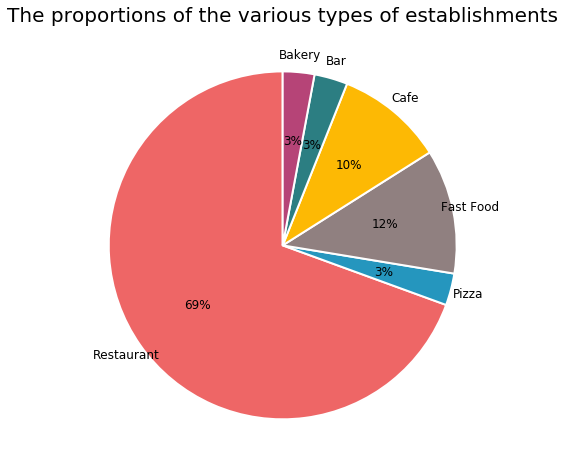

In [27]:
# calulating the number of different types of establishments
types_proportion = data.groupby('type').agg({'name':'count'})

print(BOLD + 'The number of the various types of establishments' + END)
display(types_proportion.sort_values('name', ascending=False).reset_index()\
            .rename(columns=({'name': 'number of establishments'}))\
            .style.hide_index())
print()

# Let's plot a pie chart of the proportions of different types of establishments.
# setting different graphs size for the presentation or the report
if is_presentation:
    figsize = (14, 14)
else:
    figsize = (8, 8)

fig, ax = plt.subplots(figsize=figsize) 
types_proportion.sort_index(ascending=False)\
    .plot.pie(subplots=True, autopct='%1.f%%', startangle=90, ax=ax,
              textprops={'horizontalalignment': 'center',
                         'fontsize':'large' if is_presentation else 12},
              wedgeprops={'linewidth': 2, 'edgecolor' : 'w' });
if is_presentation:
    fig.set_facecolor('#E6E6E6')
ax.set_title(set_title_stile('The proportions of the various types of establishments'));
ax.get_legend().remove()
ax.set(ylabel=None);

*The most popular type of establishments is Restaurant. There are 6.5 thousand of them, which is almost 70% of all establishments. More than a thousand establishments are Fast Food, which is 12% of all establishments. There are almost a thousand Cafes in the dataset, and that's 10%. And 3% of Bakeries, Bars and Pizzerias each.*

### 2.2 The typical type of chain and non-chain establishments
<a id='section2.2'></a>

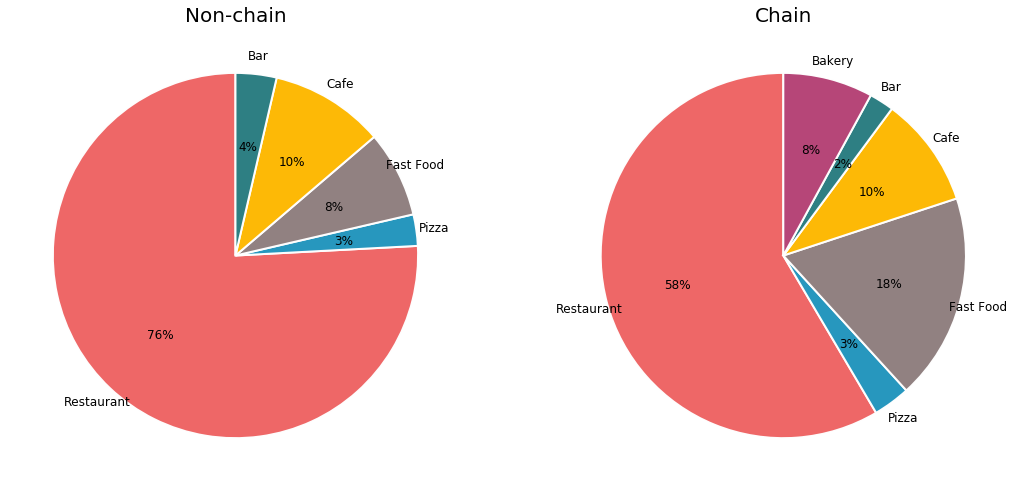

In [28]:
# Let's plot a pie chart of the proportions of different types of chain and non-chain establishments.
fig, axes = plt.subplots(ncols=2, figsize=(18, 18))
for i, (name, group) in enumerate(data.groupby('chain')):
    group.groupby('type').agg({'name':'count'})\
        .sort_index(ascending=False)\
            .plot.pie(subplots=True, autopct='%1.f%%', startangle=90, 
                textprops={'size': 'larger', 
                           'fontsize': 14 if is_presentation else 12, 
                           'weight':'bold' if is_presentation else 'normal',
                           'horizontalalignment': 'center'},
                wedgeprops={'linewidth': 2, 'edgecolor' : 'w', 'alpha':0.99}, ax=axes[i]);
    axes[i].set_title('Chain' if name else 'Non-chain');
    axes[i].get_legend().remove()
    axes[i].set(ylabel=None) 
if is_presentation:
    fig.set_facecolor('#E6E6E6')

*There are even more restaurants among the chain establishments, and they are more than three-quarters. Fast food, on opposite, is more typical for chain establishments, there are almost 20% of them among chains. The share of cafes among chain and non-chain establishments is the same, and they are 10%. Pizzerias also have equal shares, but there are only 3% of them. The share of bars is higher for non-chain establishments than for chains, 4% and 2%, respectively. In the dataset, there are only chain bakeries and their 8% of all chain establishments.*

### 2.3 The proportions of chain and nonchain establishments
<a id='section2.3'></a>

The number of chain and non-chain establishments


chain,number of establishments
False,5932
True,3471


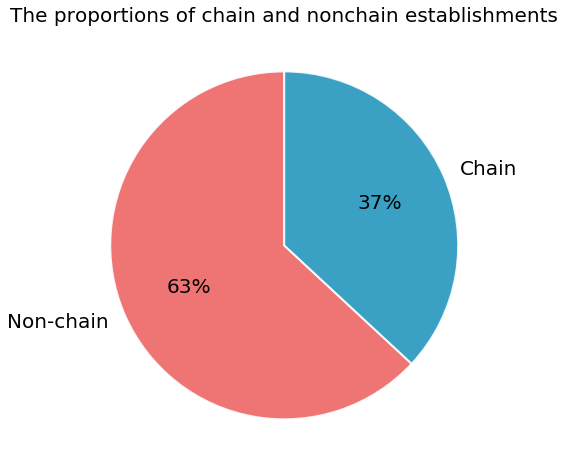

In [29]:
# calulating the number of chain and non-chain establishments
chain_proportion = data.groupby('chain').agg({'name':'count'})

print(BOLD + 'The number of chain and non-chain establishments' + END)
display(chain_proportion.reset_index()\
            .rename(columns=({'name': 'number of establishments'}))\
            .style.hide_index())
print()

# Let's plot a pie chart of the proportions of chain and non-chain establishments.
# setting different graphs size for the presentation or the report
if is_presentation:
    figsize = (12, 12)
else:
    figsize = (8, 8)
    
fig, ax = plt.subplots(figsize=figsize)
data.groupby('chain').agg({'name':'count'})\
    .plot.pie(subplots=True, autopct='%1.f%%', startangle=90,
              labels=('Non-chain', 'Chain'),
              wedgeprops={'linewidth': 2, 'edgecolor': 'w', 'alpha': 0.9}, ax=ax);
if is_presentation:
    fig.set_facecolor('#E6E6E6')
ax.get_legend().remove()
ax.set(ylabel=None)
ax.set_title(set_title_stile('The proportions of chain and nonchain establishments'));

*Most of the establishments are not chain. There are almost 6 thousand of them, which is more than 60% of all establishments. Chain establishments are respectively almost 40%.*

### 2.4 Chain: the number of chain branches and the number of seats they have
<a id='section2.4'></a>

The number of chains:  1775

Number of chains with a different number of branches they have:


branches in chain,number of chains,avg seats number
1,1335,42.3
2,244,37.2
3,81,35
4,42,45.2
5,19,54
from 5 to 10,26,35.1
from 26 to 50,23,35.2
from 51 to 100,3,50.9
more than 100,2,23.4



Chains having more 100 branches:
STARBUCKS COFFEE
SUBWAY



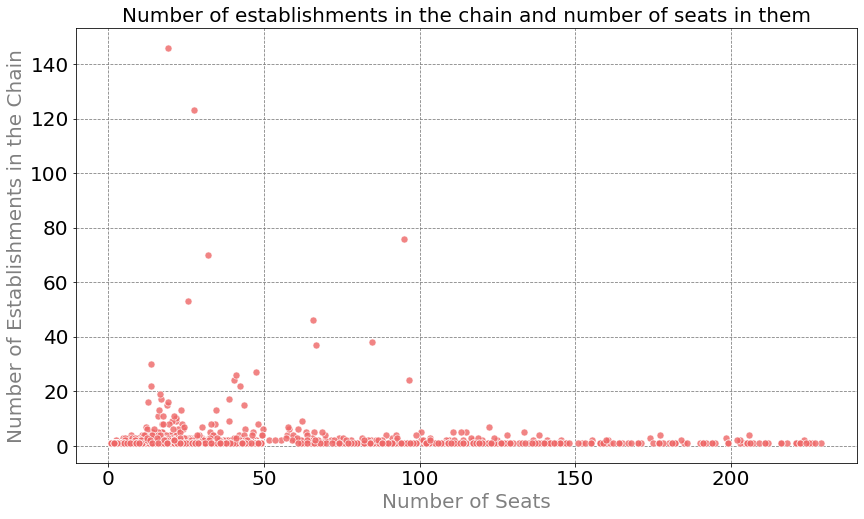

In [30]:
# Let's calculate the number of chain branches and the average number of seats they have
chain_stats = data.query('chain==True').groupby('name').number.agg(['count', 'mean'])\
                .rename(columns=({'mean': 'avg seats number'}))

print(BOLD + 'The number of chains: ' + END, len(chain_stats))
print()

#creating groups with different numbers of branches in a chain
chain_stats['branches in chain'] = [' '+str(x) if x<=5 else\
                                    ' from 5 to 10' if x<=10 else\
                                    'from 11 to 25' if  x<=10 else\
                                    'from 26 to 50' if  x<=50 else\
                                    'from 51 to 100' if  x<=100 else 'more than 100'\
                                        for x in chain_stats['count']]

print(BOLD + 'Number of chains with a different number of branches they have:' + END)
display(chain_stats.reset_index().groupby('branches in chain')\
            .agg({'name': 'count', 'avg seats number': 'mean'}).round(1)\
            .sort_index().reset_index()\
            .rename(columns=({'name': 'number of chains'}))\
            .style.hide_index())
print()

print(BOLD + 'Chains having more 100 branches:\n' + END
      + '\n'.join(chain_stats[chain_stats['branches in chain']=='more than 100'].index))
print()

# setting different graphs size for the presentation or the report
if is_presentation:
    figsize = (17, 14)
else:
    figsize = (14, 8)
    
fig, ax = plt.subplots(figsize=figsize)
sns.scatterplot(x='avg seats number', y='count', data=chain_stats, ax=ax, alpha=0.8, s=100 if is_presentation else 50);
ax.set_title(set_title_stile('Number of establishments in the chain and number of seats in them'));
ax.set_xlabel('Number of Seats');
ax.set_ylabel('Number of Establishments in the Chain');

*Most of the chains have only one branch in Los Angeles. There are about 1300 of almost 1800, which is about 75%. 80 chains have 3 branches, another 80 chains have till 10 branches, 20 chains have from 25 till 50 branches, 3 chains have from 50 till 80 branches and Starbucks Coffee and Subway have more than 100 branches.*

*Average number of seats in chains with different number of branches is from 35 to 50 seats. However, some chains have only a few branches but with a lot of seats. There are also chains with a small number of branches in the city and a small number of seats they have. Starbucks Coffee and Subway have about 20 seats, on average.*

The number of chain cafes:  101

Number of chain cafes with a different number of branches they have:


branches in chain,number of chains,avg seats number
1,66,28
2,18,28.5
3,8,30.6
4,4,50.4
5,1,69.2
8,1,23.6
9,1,21.9
53,1,25.7
123,1,27.6



Chain cafes having more 50 branches:
STARBUCKS COFFEE
THE COFFEE BEAN & TEA LEAF



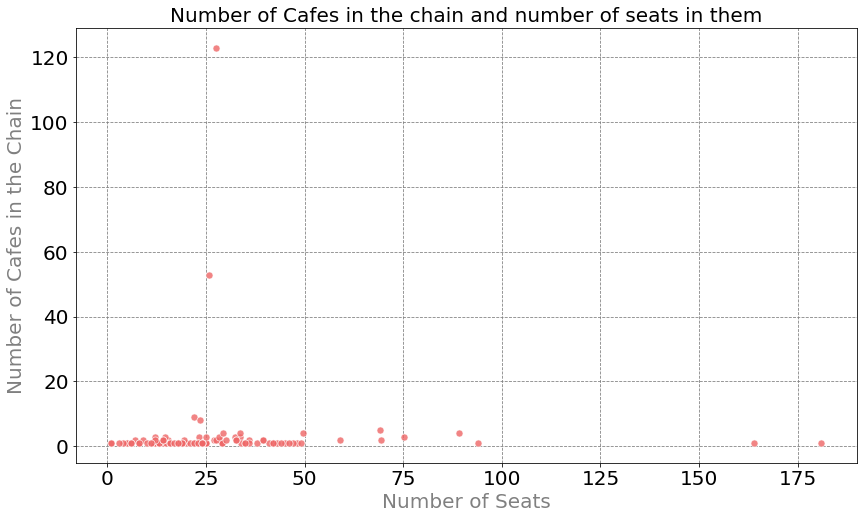

In [31]:
# Let's consider only chain cafes
# calculating the number of branches for chain cafes and the average number of seats they have
chain_cafe_stats = data.query("chain==True and type=='Cafe'").groupby('name').number.agg(['count', 'mean'])\
                .rename(columns=({'count': 'branches in chain', 'mean': 'avg seats number'}))

print(BOLD + 'The number of chain cafes: ' + END, len(chain_cafe_stats))
print()

print(BOLD + 'Number of chain cafes with a different number of branches they have:' + END)
display(chain_cafe_stats.reset_index().groupby('branches in chain')\
            .agg({'name': 'count', 'avg seats number': 'mean'}).round(1)\
            .sort_index().reset_index()\
            .rename(columns=({'name': 'number of chains'}))\
            .style.hide_index())
print()

print(BOLD + 'Chain cafes having more 50 branches:\n' + END
      + '\n'.join(chain_cafe_stats[chain_cafe_stats['branches in chain']>50].index))
print()

# setting different graphs size for the presentation or the report
if is_presentation:
    figsize = (15, 13)
else:
    figsize = (14, 8)
    
fig, ax = plt.subplots(figsize=figsize)
sns.scatterplot(x='avg seats number', y='branches in chain', data=chain_cafe_stats, ax=ax,
                alpha=0.8, s=100 if is_presentation else 50);
ax.set_title(set_title_stile('Number of Cafes in the chain and number of seats in them'));
ax.set_xlabel('Number of Seats');
ax.set_ylabel('Number of Cafes in the Chain');

*There are about 100 chain cafes. Average number of seats in chain cafes is from 25 to 50 seats. Only a few chain cafes with more than 50 seats. Most chain cafes have no more than 10 branches. Only two chains have more than 50 branches: Starbucks and The Coffee Bean & Tea Leaf. Coffee or tea with a little dessert is very popular.*

The number of fast food chains:  122

Number of fast food chains with a different number of branches they have:


branches in chain,number of chains,avg seats number
1,64,26.9
2,26,33.7
3,9,31.5
4,6,14.3
5,2,73.4
6,1,22.3
8,2,25.9
9,2,41.4
11,2,16.9
13,1,34.6



Fast Food chains having more 50 branches:



,branches in chain,avg seats number
name,,
KFC,70,32.185714
MCDONALD'S,76,94.842105
SUBWAY,143,17.727273


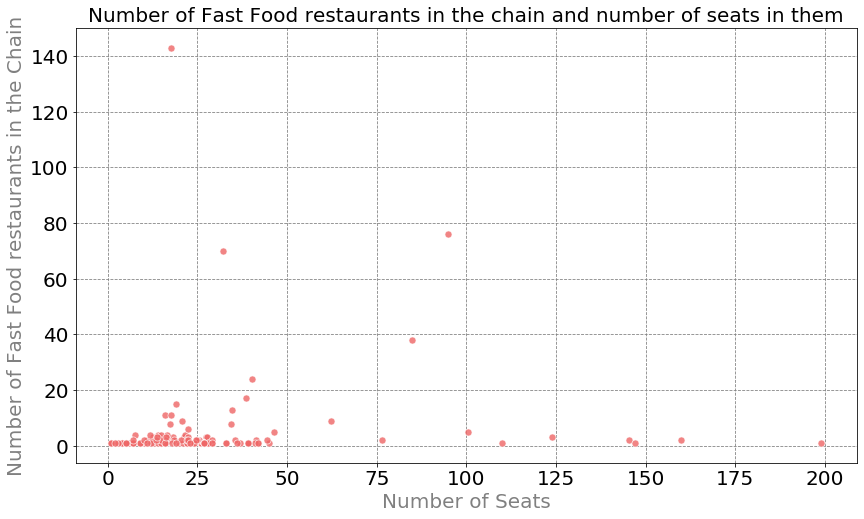

In [32]:
# Let's consider only fast food chain restaurants
# calculating the number of branches for fast food chains and the average number of seats they have
chain_ff_stats = data.query("chain==True and type=='Fast Food'").groupby('name').number.agg(['count', 'mean'])\
                .rename(columns=({'count': 'branches in chain', 'mean': 'avg seats number'}))

print(BOLD + 'The number of fast food chains: ' + END, len(chain_ff_stats))
print()

print(BOLD + 'Number of fast food chains with a different number of branches they have:' + END)
display(chain_ff_stats.reset_index().groupby('branches in chain')\
            .agg({'name': 'count', 'avg seats number': 'mean'}).round(1)\
            .sort_index().reset_index()\
            .rename(columns=({'name': 'number of chains'}))\
            .style.hide_index())
print()

print(BOLD + 'Fast Food chains having more 50 branches:\n' + END)
display(chain_ff_stats[chain_ff_stats['branches in chain']>50])
print()

# setting different graphs size for the presentation or the report
if is_presentation:
    figsize = (15, 13)
else:
    figsize = (14, 8)
    
fig, ax = plt.subplots(figsize=figsize)
sns.scatterplot(x='avg seats number', y='branches in chain', data=chain_ff_stats, ax=ax,
                alpha=0.8, s=100 if is_presentation else 50);
ax.set_title(set_title_stile('Number of Fast Food restaurants in the chain and number of seats in them'));
ax.set_xlabel('Number of Seats');
ax.set_ylabel('Number of Fast Food restaurants in the Chain');

*There are about 120 fast food chains. Average number of seats in chain cafes is from 20 to 50 seats. Only a few fast food restaurants with more than 50 seats. Most chain cafes have no more than 5 branches. But three chains have more than 60 branches: KFC, McDonals's, and SUBWAY. Moreover, McDonals's has an average of more than 90 seats.*

### 2.5 The average number of seats for each type of establishment
<a id='section2.5'></a>

Some describtive stats for the number of seats for each type of establishment:


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Restaurant,6529.0,48.62,50.75,1.0,15.0,29.0,49.00,229.0
Bar,291.0,44.64,46.82,1.0,13.0,28.0,48.00,227.0
Cafe,940.0,35.70,40.85,1.0,12.0,24.0,41.00,228.0
Fast Food,1088.0,32.47,35.33,1.0,11.0,22.0,37.25,227.0
Pizza,279.0,30.62,37.29,1.0,10.5,20.0,34.00,216.0
Bakery,276.0,22.05,25.92,1.0,9.0,18.0,25.00,218.0


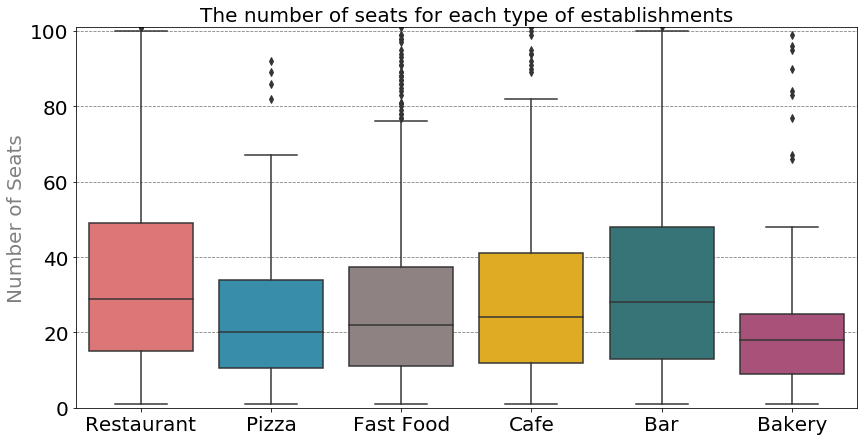

In [33]:
# Let's look at the number of seats for each type of establishment.

print(BOLD + 'Some describtive stats for the number of seats for each type of establishment:' + END)
display(data.groupby('type').number.describe().round(2).sort_values('mean', ascending=False))
print()

# setting different graphs size for the presentation or the report
if is_presentation:
    figsize = (14, 12)
else:
    figsize = (14, 7)
    
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(x='type', y='number', data=data.sort_values('type', ascending=False), ax=ax) 
ax.set_title(set_title_stile('The number of seats for each type of establishments'));
ax.set_ylabel('Number of Seats')
ax.set_xlabel(None)
ax.set_ylim((0, 101));

*On average, Restaurants have the greatest number of seats. About the same number of seats spread to bars. The smallest number of seats for bakeries.*

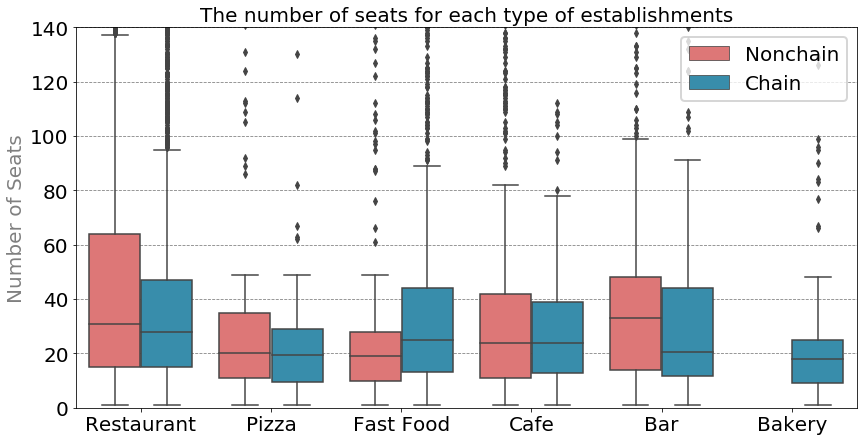

In [34]:
# Let's look at the number of seats for each type of chain and non-chain establishment.

# setting different graphs size for the presentation or the report
if is_presentation:
    figsize = (14, 12)
else:
    figsize = (14, 7)
    
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(x='type', y='number', hue='chain', data=data.sort_values('type', ascending=False), ax=ax) 
ax.set_title(set_title_stile('The number of seats for each type of establishments'));
ax.set_ylabel('Number of Seats')
ax.set_xlabel(None)
ax.legend(loc="upper right")
ax.set_ylim((0, 140));

labels = ['Nonchain', 'Chain']
for text, label in zip(ax.get_legend().texts, labels):
    text.set_text(label)

*On average, fast food chains have more seats than non-chain ones. On the contrary, for chain bars and restaurants, the number of seats is on average less than for non-chain ones. For other types of establishments, the number of seats is distributed approximately the same.*

### 2.6 The top ten streets by number of establishments
<a id='section2.6'></a>

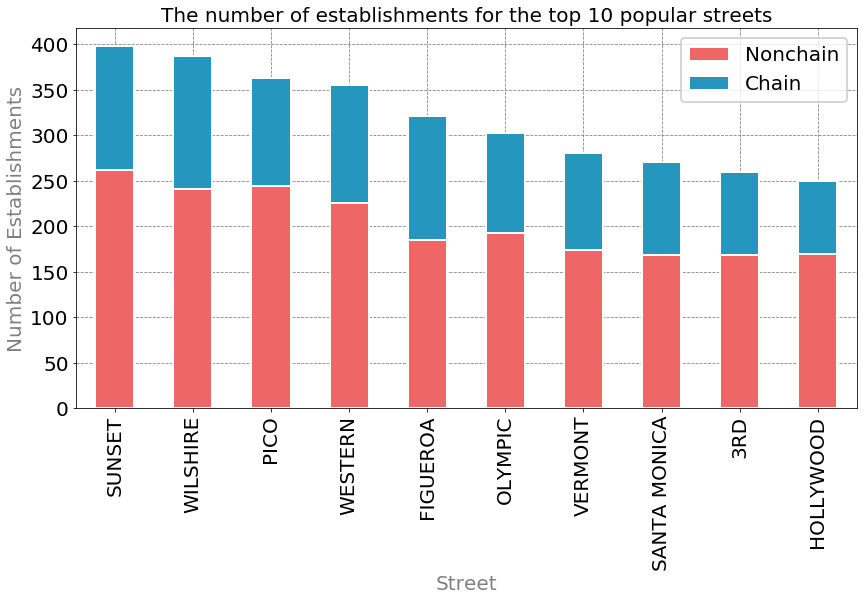

In [35]:
# Let's consider the top ten streets by number of establishments
top_10 = data.street.value_counts().head(10).index

# plotting bar plot of the number of establishments on top 10 popular streets
# setting different graphs size for the presentation or the report
if is_presentation:
    figsize = (16, 10)
else:
    figsize = (14, 7)
    
fig, ax = plt.subplots(figsize=figsize)
data[data.street.isin(top_10)]\
    .groupby(['chain', 'street']).size().reset_index()\
        .pivot(columns='chain', index='street', values=0)\
            .reindex(data.street.value_counts().head(10).index)\
                .plot(kind='bar', stacked=True, ax=ax);
ax.set_title(set_title_stile('The number of establishments for the top 10 popular streets'));
ax.set_xlabel('Street')
ax.set_ylabel('Number of Establishments')

ax.get_legend().set_title('')
labels = ['Nonchain', 'Chain']
for text, label in zip(ax.get_legend().texts, labels):
    text.set_text(label)

*On the 10 streets with the largest number of establishments, there are from 250 to almost 400 establishments. Either these are streets with a lot of shopping malls with foodcords, or they are very long streets. The share of chain establishments among them is approximately the same, about 40%.*

### 2.7 The number establishments on the street
<a id='section2.7'></a>

The number of streets that only have one establishment is 170, witch is 38.5%.



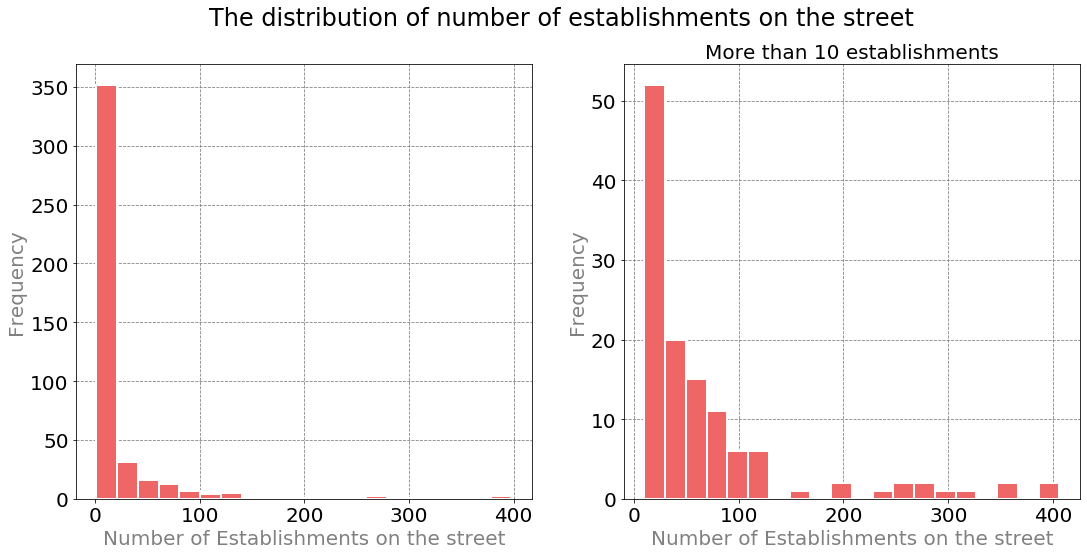

In [36]:
one_establishmet_streets = sum(data.street.value_counts()==1)
print(BOLD + 'The number of streets that only have one establishment is {}, witch is {:.1%}.'\
          .format(one_establishmet_streets, one_establishmet_streets/data.street.nunique()) + END)
print()

# Let's look at the distribution of number of establishments on a street
fig, axes = plt.subplots(ncols=2, figsize=(18, 8))
data.street.value_counts().hist(bins=20, ax=axes[0]);
data.street.value_counts().hist(bins=20, range=(10, 406), ax=axes[1]);
fig.suptitle(set_title_stile('The distribution of number of establishments on the street'));
axes[1].set_title('More than 10 establishments')
for i in range(2):   
    axes[i].set_xlabel('Number of Establishments on the street');
    axes[i].set_ylabel('Frequency');

*Most of the streets have only a few establishments. There are 40% of streets with only one restaurant. Only a few streets have more than 100 establishments.*

### 2.8 The distribution of seats number for establishments on top 10 popular streets
<a id='section2.8'></a>

Descibtive statistics for the number of seats for streets with a lot of establishments:


,count,min,max,mean,median,perc75,perc95,perc99
number of seats,3187.0,1.0,229.0,45.9,29.0,47.0,155.0,217.14


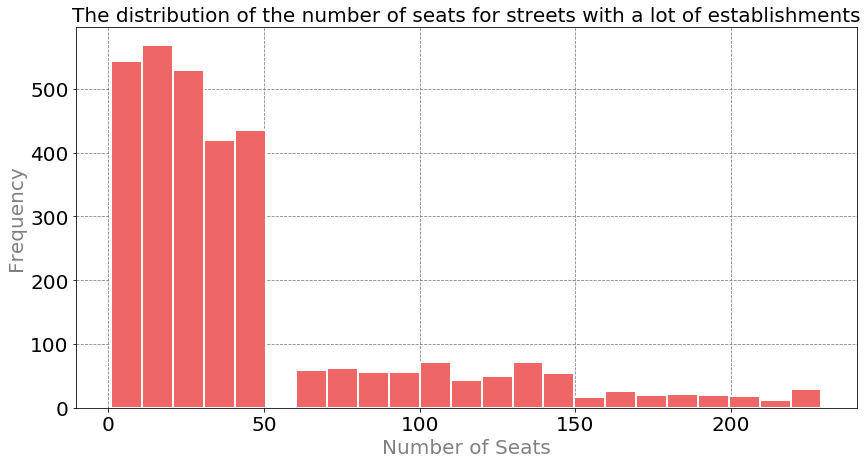

In [37]:
# Let's look at the distribution of seats number for top 10 popular streets that have a lot of establishments

# function to calculate 75th percentile
def perc75(series):
    return series.quantile(0.75) 

# function to calculate 95th percentile
def perc95(series):
    return series.quantile(0.95)

# function to calculate 99th percentile
def perc99(series):
    return series.quantile(0.99)

print(BOLD + 'Descibtive statistics for the number of seats for streets with a lot of establishments:' + END)
display(data[data.street.isin(top_10)]\
            .agg({'number':['count', 'min', 'max', 'mean', 'median', perc75, perc95, perc99]})\
            .round(2).rename(columns={'number': 'number of seats'}).T)
print()

# setting different graphs size for the presentation or the report
if is_presentation:
    figsize = (21, 16)
else:
    figsize = (14, 7)
    
fig, ax = plt.subplots(figsize=figsize)
data[data.street.isin(top_10)].number.hist(bins=23, ax=ax);
ax.set_title(set_title_stile('The distribution of the number of seats for streets with a lot of establishments'));
ax.set_xlabel('Number of Seats');
ax.set_ylabel('Frequency');

*Most establishments on 10 popular streets have less than 50 seats (more than 75% of establishments, see 75th percentile). There are 3 groups of about 500 establishments with up to 10 seats, from 10 to 20 seats and from 20 to 30 seats, and 2 more groups of about 400 establishments with seats from 30 to 40 and from 40 to 50 (see the first 5 bars of the histogram). There are no establishments with a number of seats from 50 to 60. There are 50 establishments each with a range of seats 60-70, 70-80, and so on up to 140-150. Slightly more than 5% of the establishments of the ten most popular streets have more than 150 seats (see 95th percentile).*

### Conclusions
<a id='section2.9'></a>

During the analysis, the following patterns were identified:
* The most popular type of establishment is a restaurant. The share of cafes and fast food restaurants is 10 percent or more. It is worth taking a closer look at them too.
* Three quarters of all non-chain establishments are restaurants. Fast food restaurants are more popular among chain establishments, accounting for 20% of all chains.
* Most of the establishments are not chain. Their share is more than 60 percent. 
* 75% of the chains have only one branch in Los Angeles. Average number of seats in chains with different number of branches is from 35 to 50 seats. Some chains have only a few branches but with a lot of seats. Some chains have small number of branches and a small number of seats in them.
* On average, Restaurants have the greatest number of seats. About the same number of seats spread to bars. The smallest number of seats for bakeries.
* On the 10 streets with the largest number of establishments, there are from 250 to almost 400 establishments. The share of chain establishments among them is approximately the same, about 40%.
* Most of the streets have only a few establishments. There are 40% of streets with only one restaurant. Only a few streets have more than 100 establishments. 
* More than 75% of establishments have less than 50 seats. About 5% of the establishments of the ten most popular streets have more than 150 seats.

## 3. Recomendations
<a id='section3'></a>

The main recomendation is to open __a fast-food establishment with many seats on lively street__. 

Robot-run establishment as a unique selling point that allows us to minimise the delivery time, so I would advise to develop a fast-food chain in different streets of the city, which already have many establishments and that’s a sign of high traffic, so there are a lot of people walking along the street, so we can lower marketing expenses 

Thus, robot-run means that we can cook and deliver fast and serve a lot of people. Time is a significant success factor for fast-food establishments. Among chains fast-food establishments are also popular. So the chance of developing a chain is high. Location with high traffic will allow us to test the concept - there is enough customers even without a huge marketing budget - whether the concept is viable or not. 